# *NATURAL LANGUAGE PROCESSING CAPSTONE PROJECT AIML* 

# **CHATBOT INTERFACE**

• **DOMAIN:** Industrial safety. NLP based Chatbot.

• **CONTEXT:**
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

• **DATA DESCRIPTION:**
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

**Columns description:**

    ‣ Data: timestamp or time/date information
    ‣ Countries: which country the accident occurred (anonymised)
    ‣ Local: the city where the manufacturing plant is located (anonymised)
    ‣ Industry sector: which sector the plant belongs to
    ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
    involved in the accident)
    ‣ Genre: if the person is male of female
    ‣ Employee or Third Party: if the injured person is an employee or a third party
    ‣ Critical Risk: some description of the risk involved in the accident
    ‣ Description: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]


**• PROJECT OBJECTIVE:**
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]

            ‣ Input: Interim report
            ‣ Process: [ 15 points ]
            ‣ Step 1: Import the data
            ‣ Step 2: Data cleansing
            ‣ Step 3: Data preprocessing
            ‣ Step 4: Data preparation to be used for AIML model learning
            ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning [ 2.5 points ]
            ‣ Submission: Interim report 1 [ 2.5 points ]

2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
            ‣ Input: Output of milestone 1
            ‣ Process: [ 15 points ]
            ‣ Step 1: NLP pre processing
            ‣ Step 2: Design, train and test machine learning classifiers
            ‣ Step 3: Design, train and test Neural networks classifiers
            ‣ Step 4: Design, train and test RNN or LSTM classifiers
            ‣ Step 5: Choose the best performing model classifier and pickle it.
            ‣ Output: Pickled model to be used for future prediction [ 2.5 points ]
            ‣ Submission: Interim report 2 [ 2.5 points ]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
np.random.seed(15)
import tensorflow as tf
tf.__version__

'2.8.2'

In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip3 install --upgrade gensim --user


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random, re
import time

# used to supress display of warnings
import warnings

import missingno as mno

# nlp libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

import holoviews as hv
from holoviews import opts

import os;
from os import makedirs

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

# save models
import pickle

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score,log_loss

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
from keras.utils import np_utils
from keras.layers import Input
from keras.layers.merge import Concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **MileStone 1 : Step 1** : Importing the data



In [6]:
path_name =  "/content/drive/MyDrive/aiml/FInal project"
for dirname, _, filenames in os.walk(path_name):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/aiml/FInal project/glove.6B.200d.txt
/content/drive/MyDrive/aiml/FInal project/Accidents_Storyline_example.png
/content/drive/MyDrive/aiml/FInal project/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv
/content/drive/MyDrive/aiml/FInal project/IHMStefanini_industrial_safety_and_health_database.csv
/content/drive/MyDrive/aiml/FInal project/industrial-safety-complete-solution.ipynb
/content/drive/MyDrive/aiml/FInal project/Copy of trailNotebook_Santosh.ipynb
/content/drive/MyDrive/aiml/FInal project/trailNotebook_Santosh.ipynb


In [7]:
filename ="IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv"
df = pd.read_csv(os.path.join(path_name, filename) )
df.head(5)

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [8]:
shape_of_data = df.shape
print("No of rows : " + str(shape_of_data[0]) +"\n")
print("No of columns : " + str(shape_of_data[1]) +"\n")

No of rows : 425

No of columns : 11



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


We noticed that except a 'date' column all other columns are categorical columns.

### **MileStone 1 : Step 2** : Data cleansing

> **Lets remove the Unnamed: 0**

In [10]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(1)

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   

  Potential Accident Level Genre Employee or Third Party Critical Risk  \
0                       IV  Male             Third Party       Pressed   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...

> **Lets rename the data to date, countries to country, genre to gender, 'Employee or Third Party' to 'Employee type**

In [11]:
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

df.head(2)

Date     Country     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   

  Potential Accident Level Gender Employee type        Critical Risk  \
0                       IV   Male   Third Party              Pressed   
1                       IV   Male      Employee  Pressurized Systems   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...

We see that now the columns are correctly labelled.

> **Lets check for duplicates and drop the duplicates**

In [12]:
df.duplicated().sum()

7

In [13]:
duplicates = df.duplicated()

df[duplicates]

Date     Country     Local Industry Sector Accident Level  \
77   2016-04-01 00:00:00  Country_01  Local_01          Mining              I   
262  2016-12-01 00:00:00  Country_01  Local_03          Mining              I   
303  2017-01-21 00:00:00  Country_02  Local_02          Mining              I   
345  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
346  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
355  2017-03-15 00:00:00  Country_03  Local_10          Others              I   
397  2017-05-23 00:00:00  Country_01  Local_04          Mining              I   

    Potential Accident Level Gender         Employee type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

In [14]:
df.drop_duplicates(inplace=True)
df.shape


(418, 10)

> **Let's check the unique and frequency(mode) of each variable.**

In [15]:
for x in df.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(df[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

    We observed that there are records of accidents from 1st Jan 2016 to 9th July 2017 in every month. So there are no outliers in the 'Date' column.

    There are only three country types so there are no outliers in 'Country' column.

    There are 12 Local cities where manufacturing plant is located and it's types are in sequence so there are no outliers in 'Local' column.

    There are only three Industry Sector types which are in sequence so there are no outliers in 'Industry Sector' column.

    There are only five Accident Level types which are in sequence so there are no outliers in 'Accident Level' column.

    There are only six Potential Accident Level types which are in sequence so there are no outliers in 'Potential Accident Level' column.

    There are only two Gender types in the provided data so there are no outliers in 'Gender' column.

    There are only three Employee types in the provided data so there are no outliers in 'Gender' column.

    There are quite a lot of Critical risk descriptions and we don't see any outliers but with the help of SME we can decide whether this column has outliers or not.

> **Lets check for missing values**

In [16]:
df.isnull().sum()


Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

### **MileStone 1 : Step 3** : Data Pre-processing

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)
df['Weekday'] = df.Date.apply(lambda x : x.day_name())
df['WeekofYear'] = df.Date.apply(lambda x : x.weekofyear)

df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

**We can create seasonal variable based on month variable.**

Spring : September to November

Summer : December to February

Autumn : March to May

Winter : June to August

In [18]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season


In [19]:
df['Season'] = df['Month'].apply(month2seasons)
df.head(3)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  WeekofYear  Season  
0     Friday          53  Summer  
1   Saturday          53  Summer  
2  Wednesday           1  Summer

We can create holidays variable based on Brazil holidays list from 2016 and 2017.

Another national holidays are election days. There are a plenty of unofficial ethnic and religious holidays in Brazil. Octoberfest, Brazilian Carnival, Kinderfest, Fenaostra, Fenachopp, Musikfest, Schutzenfest, Kegelfest, Cavalhadas, Oberlandfest, Tirolerfest, Marejada are among them.

Note: Considering official holidays only.

In [20]:
import holidays

brazil_holidays = []

print('--'*40); print('List of Brazil holidays in 2016'); print('--'*40)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print('--'*40); print('List of Brazil holidays in 2017'); print('--'*40)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Ano novo')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 3, 27), 'Páscoa')
(datetime.date(2016, 5, 26), 'Corpus Christi')
(datetime.date(2016, 2, 10), 'Quarta-feira de cinzas (Início da Quaresma)')
(datetime.date(2016, 2, 9), 'Carnaval')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
------------------------------------------------------

In [21]:
df['Is_Holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in df['Date']]
df.head(3)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  WeekofYear  Season  Is_Holiday  
0     Friday          53  Summer           1  
1   Saturday          53  Summer           0  
2  Wednesday           1  Summer           0

### **MileStone 1 : Step 4** Data preparation to be used for AIML model learning

Here 
Target variable/dependent variable: 'Accident Level', 'Potential Accident Level'

Independent variables (Input varibles): 'Date', 'Country', 'Local', 'Industry Sector', 'Gender', 'Employee type', 'Critical Risk', 'Description'

In [134]:
def countplot_data(data, param):
  sns.set(style="whitegrid")
  plt.figure(figsize=(8,5))
  total = float(len(data))
  ax = sns.countplot(x=param, data=data)
  plt.title('Data provided for each event', fontsize=20)
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()

**Number of accidents happening on particular weekdays**

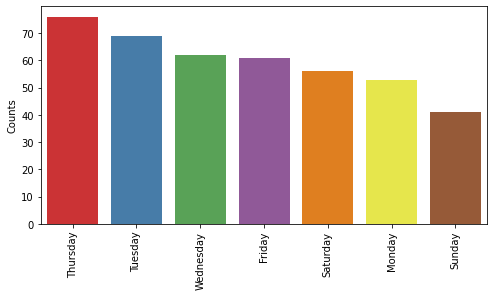

In [22]:
plt.figure(figsize=(8,4))
Weekday = df['Weekday'].value_counts()
sns.barplot(y = Weekday , x = Weekday.index, palette="Set1")
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

**Critical Risk in various kind of enviroments**

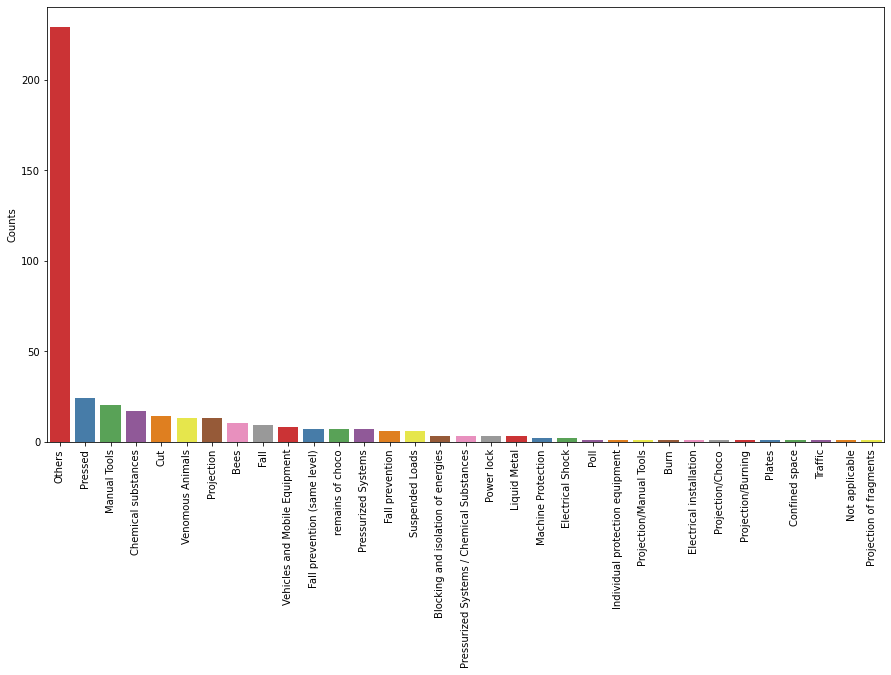

In [23]:
plt.figure(figsize=(15,8))
CritRisk = df['Critical Risk'].value_counts() 
sns.barplot(y = CritRisk , x = CritRisk.index, palette="Set1")
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

**Comparison between accident levels & Potential accident levels**

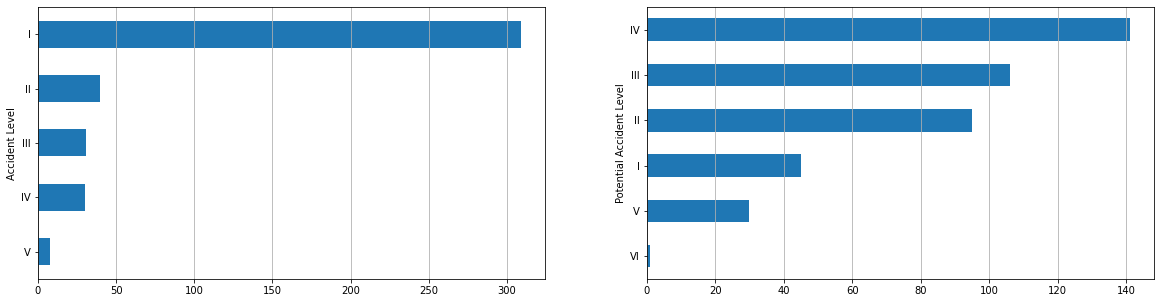

In [24]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
df[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
df[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')


plt.show()

**Countries - Accident Percentage**

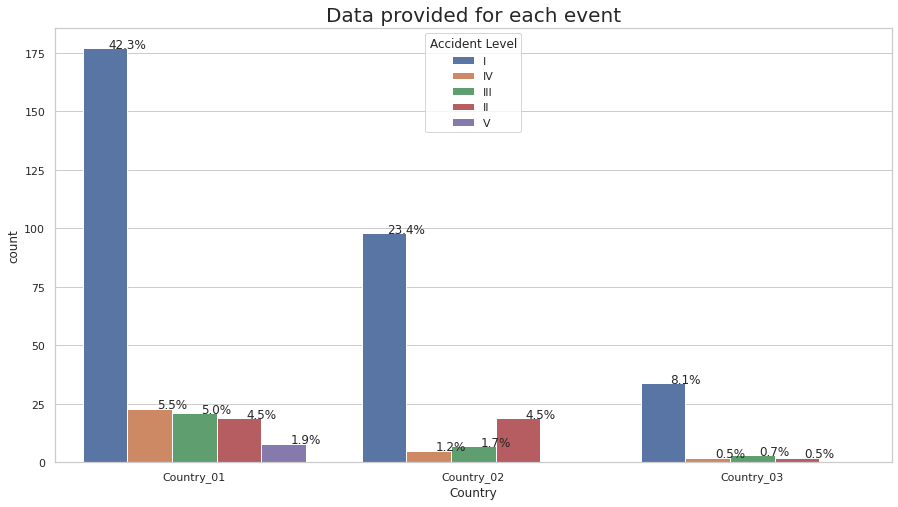

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x="Country", hue=acc_level, data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Sectors - Accident Percentage**

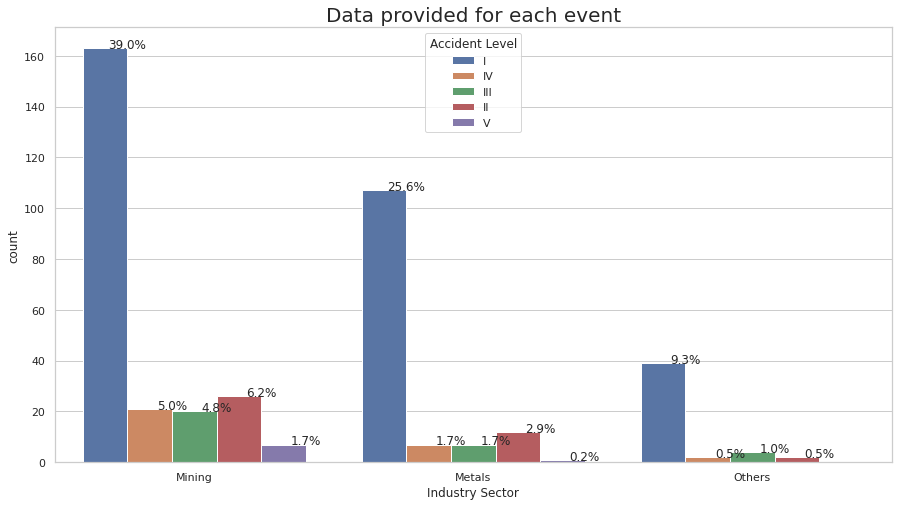

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x="Industry Sector", hue=acc_level, data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Workforce - Accident Percentage**

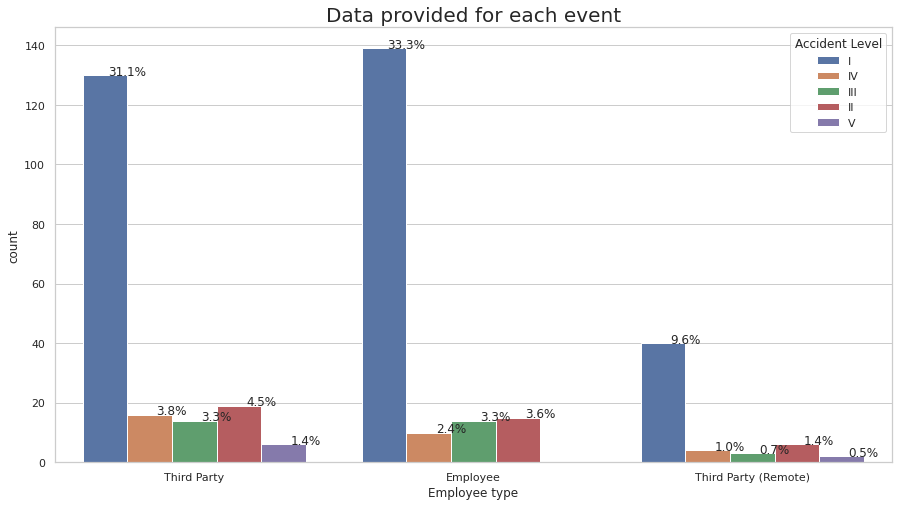

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x="Employee type", hue=acc_level, data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

* 44% Third party empoyees working in this industry.
* 43% own empoyees working in this industry.
* 13% Third party(Remote) empoyees working in this industry.

**Local**

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
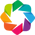

:Bars   [index]   (Local)

In [28]:
local_cnt = np.round(df['Local'].value_counts(normalize=True) * 100)

hv.extension('bokeh')
hv.Bars(local_cnt).opts(title="Local Count", color="#8888ff", xlabel="Locals", ylabel="Percentage", yformatter='%d%%')\
                .opts(opts.Bars(width=700, height=300,tools=['hover'],show_grid=True))

**Country**

------------------------------------------------------------
Value Counts for `Country` label
------------------------------------------------------------
Country_01 count: 248 i.e. 59.0%
Country_02 count: 129 i.e. 31.0%
Country_03 count: 41 i.e. 10.0%
------------------------------------------------------------
Distributon of `Country` label
------------------------------------------------------------


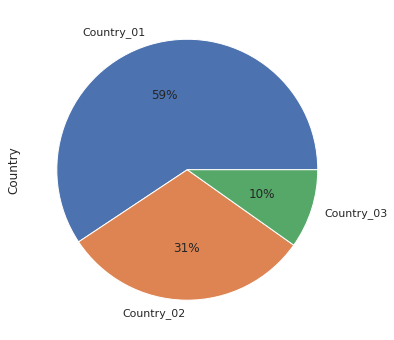

In [29]:
print('--'*30); print('Value Counts for `Country` label'); print('--'*30)

total_row_cnt = df.shape[0]
country_01_cnt = df[df.Country == 'Country_01'].shape[0]
country_02_cnt = df[df.Country == 'Country_02'].shape[0]
country_03_cnt = df[df.Country == 'Country_03'].shape[0]

print(f'Country_01 count: {country_01_cnt} i.e. {round(country_01_cnt/total_row_cnt*100, 0)}%')
print(f'Country_02 count: {country_02_cnt} i.e. {round(country_02_cnt/total_row_cnt*100, 0)}%')
print(f'Country_03 count: {country_03_cnt} i.e. {round(country_03_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Country` label'); print('--'*30)
_ = df['Country'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (10, 6))

Here we can see that 
> 59% accidents occurred in Country_01

> 31% accidents occurred in Country_02

> 10% accidents occurred in Country_03

**Industry Sector**

------------------------------------------------------------
Value Counts for `Industry Sector` label
------------------------------------------------------------
Mining count: 237 i.e. 57.0%
Metals count: 134 i.e. 32.0%
Others count: 47 i.e. 11.0%


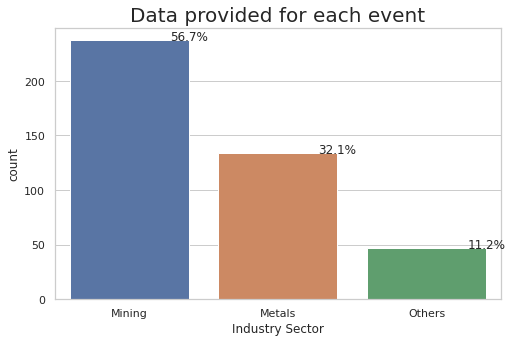

In [135]:
print('--'*30); print('Value Counts for `Industry Sector` label'); print('--'*30)

Mining_cnt = df[df['Industry Sector'] == 'Mining'].shape[0]
Metals_cnt = df[df['Industry Sector'] == 'Metals'].shape[0]
Others_cnt = df[df['Industry Sector'] == 'Others'].shape[0]

print(f'Mining count: {Mining_cnt} i.e. {round(Mining_cnt/total_row_cnt*100, 0)}%')
print(f'Metals count: {Metals_cnt} i.e. {round(Metals_cnt/total_row_cnt*100, 0)}%')
print(f'Others count: {Others_cnt} i.e. {round(Others_cnt/total_row_cnt*100, 0)}%')
countplot_data(df,'Industry Sector')

* The number of accidents decreases as the Accident Level increases.
* The number of accidents increases as the Potential Accident Level increases.

**Gender**

------------------------------------------------------------
Value Counts for `Gender` label
------------------------------------------------------------
Male count: 396 i.e. 95.0%
Female count: 22 i.e. 5.0%


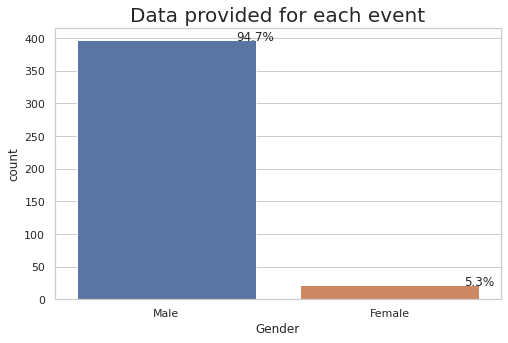

In [136]:
print('--'*30); print('Value Counts for `Gender` label'); print('--'*30)

Male_cnt = df[df['Gender'] == 'Male'].shape[0]
Female_cnt = df[df['Gender'] == 'Female'].shape[0]

print(f'Male count: {Male_cnt} i.e. {round(Male_cnt/total_row_cnt*100, 0)}%')
print(f'Female count: {Female_cnt} i.e. {round(Female_cnt/total_row_cnt*100, 0)}%')

countplot_data(df,'Gender')

* There are more men working in this industry as compared to women.

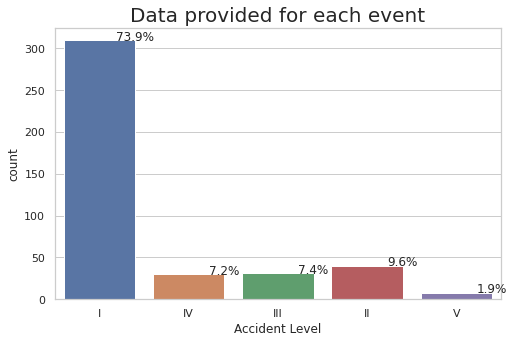

In [137]:
countplot_data(df,'Accident Level')

The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.

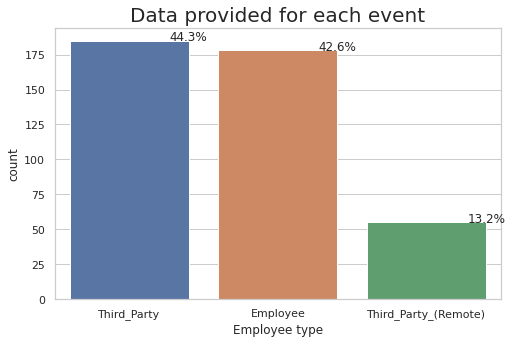

In [138]:
countplot_data(df,'Employee type')

#### Bivariate Analysis and Hypothesis testing

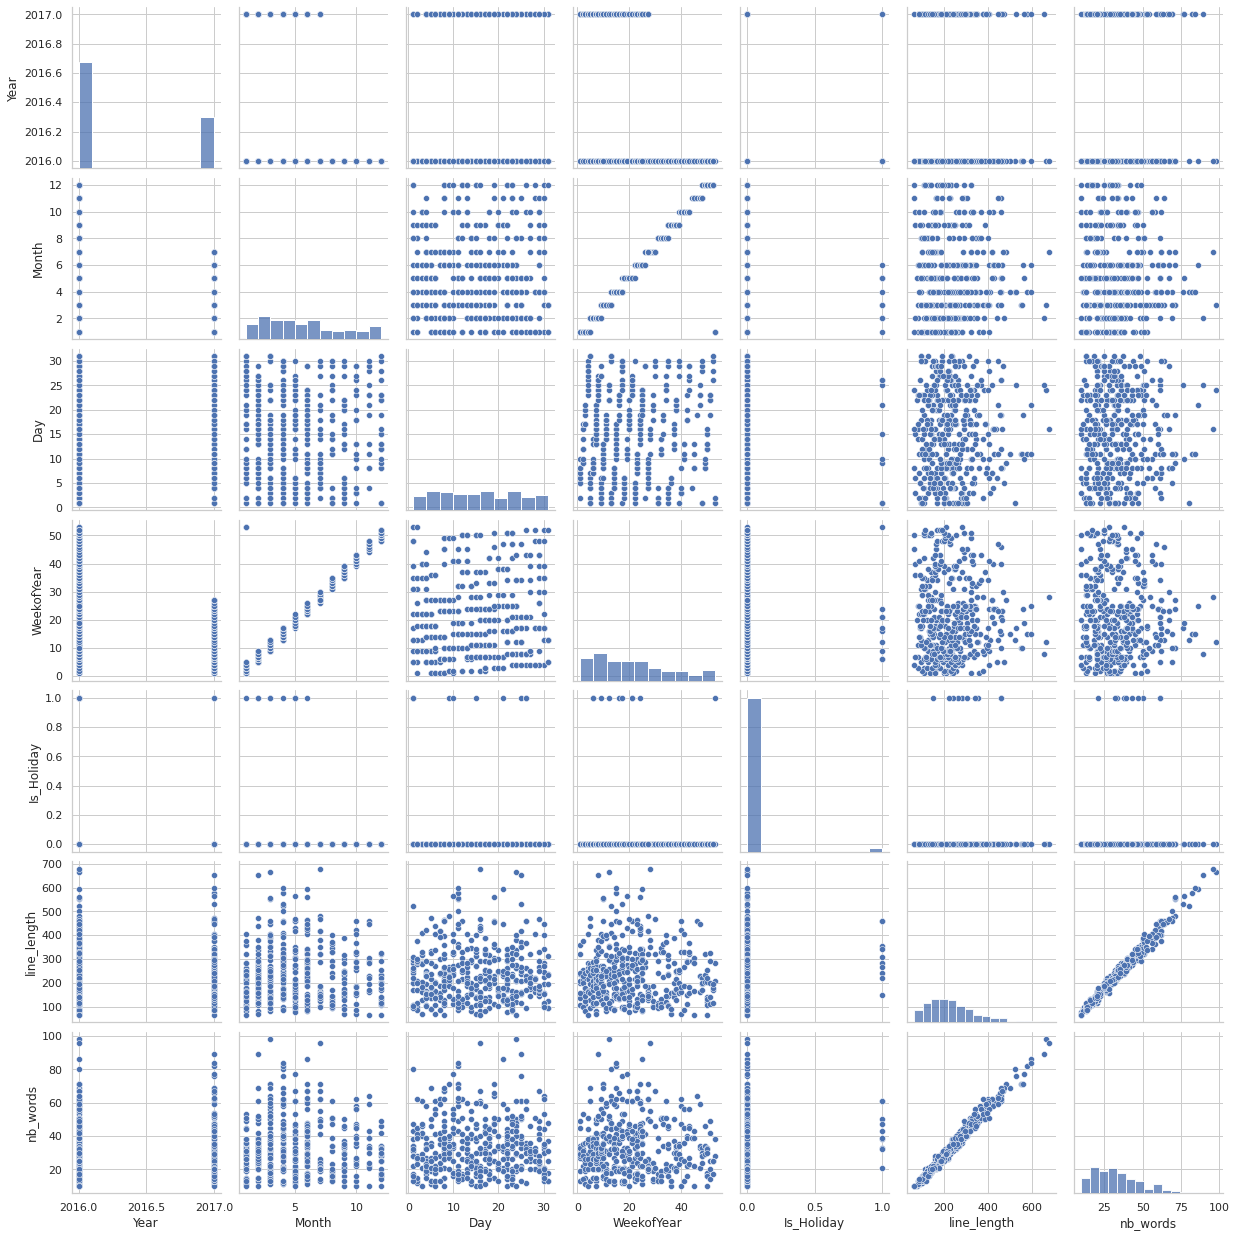

In [140]:
sns.pairplot(df)
plt.show()

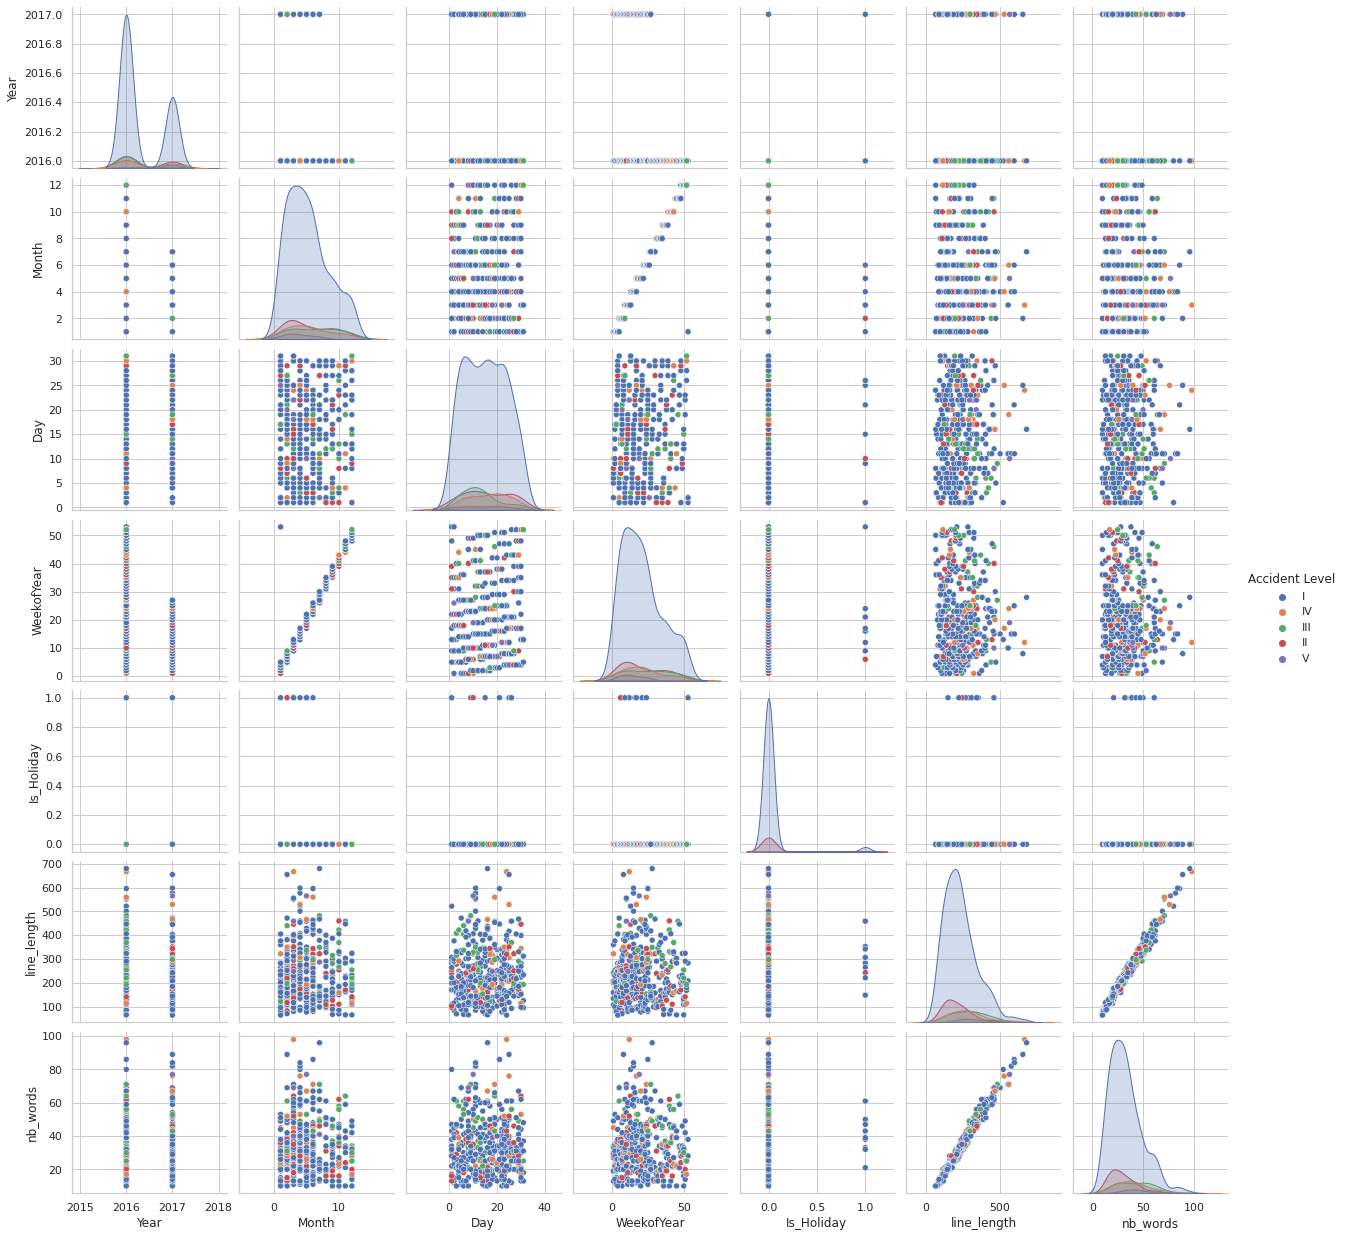

In [139]:
sns.pairplot(df, hue ='Accident Level')
plt.show()

##### a. Industry Sector by Countries - Is the distribution of industry sector different significantly in differ countries or not?

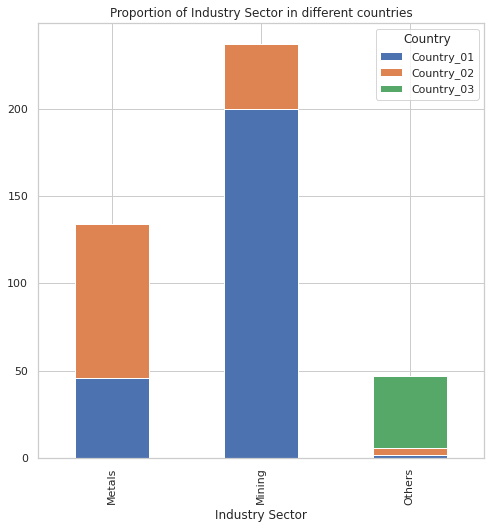

In [32]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = df['Industry Sector'], columns = df['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

**Observations**

* Metals and Mining industry sector plants are not available in Country_03.
* Distribution of industry sector differ significantly in each country. But let's check the proportion of metals, mining and others sector in Country_01 and is that difference is statistically significant?

###### 1. State the H0 and Ha

###### Ho = The proportions of industry sector is not differ in different countries
###### Ha = The proportions of industry sector is differ in different countries

###### 2. Decide the significance level: alpha = 0.05

###### 3. Identify the test-statistic: Z-test of proportions

###### 4. Calculate the p_value using test-statistic

In [33]:
mining_country1 = df[df['Industry Sector'] == 'Mining']['Country'].value_counts()[0]
mining_country2 = df[df['Industry Sector'] == 'Mining']['Country'].value_counts()[1]

metals_country1 = df[df['Industry Sector'] == 'Metals']['Country'].value_counts()[1]
metals_country2 = df[df['Industry Sector'] == 'Metals']['Country'].value_counts()[0]

others_country1 = df[df['Industry Sector'] == 'Others']['Country'].value_counts()[2]
others_country2 = df[df['Industry Sector'] == 'Others']['Country'].value_counts()[1]
others_country3 = df[df['Industry Sector'] == 'Others']['Country'].value_counts()[0]

print([mining_country1, metals_country1, others_country1], [country_01_cnt])
print(f'Proportions of mining, metals, others in country_01 = {round(200/248,2)}%, {round(46/248,2)}%, {round(2/248,2)}% respectively')

[200, 46, 2] [248]
Proportions of mining, metals, others in country_01 = 0.81%, 0.19%, 0.01% respectively


In [34]:
from statsmodels.stats.proportion import proportions_ztest

# Z-test proportions: More than 2 samples not implemented yet, hence I am passing two elements
t_statistic, p_value = proportions_ztest([mining_country1, metals_country1], [country_01_cnt])

print("Mining and Metals t_statistic", t_statistic)
print("Mining and Metals p_value", p_value)

t_statistic, p_value = proportions_ztest([mining_country1, others_country1], [country_01_cnt])

print("Mining and Others t_statistic", t_statistic)
print("Mining and Others p_value", p_value)

Mining and Metals t_statistic 13.830057992106923
Mining and Metals p_value 1.6788511371823555e-43
Mining and Others t_statistic 18.094920466702863
Mining and Others p_value 3.494480338628687e-73


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###### 5. Decide to Reject or Accept Null Hypothesis

In [35]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


* Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from metals sector)

* Hence we reject Null Hypothesis, we have enough (95%) evidence to prove that, the mining sector in country 1 is differ from others sector)

##### b. Employee type by Gender - Is the distribution of employee type differ significantly in different genders?

In [36]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = df.groupby(['Gender','Employee type'])['Employee type'].count().unstack().apply(f, axis=1)

hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Employee type'], 'value').opts(opts.Bars(title="Employee type by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Gender,Employee type]   (value)

**Observations**

* Proportion of third party employees in each gender is equal.
* Proportion of third party(remote) employees in each gender is not equal.
* Proportion of own employees in each gender is not equal. But let's check is that difference is statistically significant?

###### 1. State the H0 and Ha

###### Ho = The proportions of own employees in each gender is equal.
###### Ha = The proportions of own employees in each gender is not equal.

###### 2. Decide the significance level: alpha = 0.05

###### 3. Identify the test-statistic: Z-test of proportions

###### 4. Calculate the p_value using test-statistic

In [37]:
male_emp = df[df['Employee type'] == 'Employee'].Gender.value_counts()[0]
female_emp = df[df['Employee type'] == 'Employee'].Gender.value_counts()[1]

print([male_emp, female_emp], [Male_cnt, Female_cnt])
print(f'Proportion of own employee types in male, female = {round(170/396,2)}%, {round(8/22,2)}% respectively')

[170, 8] [396, 22]
Proportion of own employee types in male, female = 0.43%, 0.36% respectively


In [38]:
t_statistic, p_value = proportions_ztest([male_emp, female_emp], [Male_cnt, Female_cnt])

print("t_statistic", t_statistic)
print("p_value", p_value)

t_statistic 0.6061911815982839
p_value 0.5443878078917722


###### 5. Decide to Reject or Accept Null Hypothesis

In [39]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


Hence we fail to reject Null Hypothesis, we have enough (95%) evidence to prove that, the proportion of own employees in each gender is equal.

##### c. Industry Sector by Gender - Is the distribution of industry sector differ significantly in different genders?

In [40]:
f = lambda x : np.round(x/x.sum() * 100)
em_gen = df.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(f, axis=1)

em_gen

Industry Sector  Metals  Mining  Others
Gender                                 
Female             59.0    23.0    18.0
Male               31.0    59.0    11.0

**Observations**

* Proportion of Metals sector employees in each gender is not equal.
* Proportion of Mining sector employees in each gender is not equal.
* Proportion of Others sector employees in each gender is not equal.

##### d. Accident Levels by Gender - Is the distribution of accident levels and potential accident levels differ significantly in different genders?

In [41]:
f = lambda x : np.round(x/x.sum() * 100)

ac_gen = df.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)

display(ac_gen)
pot_ac_gen = df.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
display(pot_ac_gen)


Accident Level     I    II  III   IV    V
Gender                                   
Female          82.0  14.0  5.0  NaN  NaN
Male            73.0   9.0  8.0  8.0  2.0

Potential Accident Level     I    II   III    IV    V   VI
Gender                                                    
Female                     NaN  64.0  14.0  18.0  5.0  NaN
Male                      11.0  20.0  26.0  35.0  7.0  0.0

**Observations**

* Proportion of accident levels in each gender is not equal and males have a higher accident levels than females.
* There are many low risks at general accident level, but many high risks at potential accident level.

##### e. Accident Levels by Employee type - Is the distribution of accident levels and potential accident levels differ significantly in different employee types?

In [42]:
f = lambda x : np.round(x/x.sum() * 100)

ac_em = df.groupby(['Employee type','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1)
display(ac_em)
pot_ac_em = df.groupby(['Employee type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1)
display(pot_ac_em)


Accident Level           I    II  III   IV    V
Employee type                                  
Employee              78.0   8.0  8.0  6.0  NaN
Third Party           70.0  10.0  8.0  9.0  3.0
Third Party (Remote)  73.0  11.0  5.0  7.0  4.0

Potential Accident Level     I    II   III    IV    V   VI
Employee type                                             
Employee                   7.0  25.0  30.0  33.0  6.0  NaN
Third Party               16.0  20.0  19.0  37.0  8.0  1.0
Third Party (Remote)       7.0  25.0  33.0  27.0  7.0  NaN

**Observations**

* For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

##### f. Accident Levels by Month - Is the distribution of accident levels and potential accident levels differ significantly in different months?

In [43]:
f = lambda x : np.round(x/x.sum() * 100)

ac_mo = df.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
display(ac_mo)

pot_ac_mo = df.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
display(pot_ac_mo)

Accident Level     I    II   III    IV    V
Month                                      
1               82.0   5.0   5.0   5.0  3.0
2               69.0  15.0   7.0   8.0  2.0
3               68.0  14.0   6.0   6.0  6.0
4               84.0   4.0   6.0   6.0  0.0
5               78.0   8.0   2.0  10.0  2.0
6               80.0   6.0   4.0   8.0  2.0
7               67.0   4.0  17.0   8.0  4.0
8               71.0  14.0  10.0   5.0  0.0
9               75.0  12.0   8.0   4.0  0.0
10              52.0  19.0  19.0  10.0  0.0
11              69.0   8.0   8.0  15.0  0.0
12              74.0   9.0  13.0   4.0  0.0

Potential Accident Level     I    II   III    IV     V   VI
Month                                                      
1                         10.0   8.0  41.0  38.0   0.0  3.0
2                         10.0  23.0  25.0  31.0  11.0  0.0
3                         12.0  14.0  26.0  32.0  16.0  0.0
4                          8.0  25.0  27.0  29.0  10.0  0.0
5                         18.0  15.0  25.0  32.0  10.0  0.0
6                         22.0  18.0  24.0  33.0   4.0  0.0
7                          0.0  42.0  12.0  38.0   8.0  0.0
8                          5.0  33.0  33.0  29.0   0.0  0.0
9                         17.0  38.0  17.0  29.0   0.0  0.0
10                         0.0  19.0  24.0  57.0   0.0  0.0
11                        15.0  38.0   8.0  31.0   8.0  0.0
12                         0.0  35.0  26.0  35.0   4.0  0.0

**Observations**

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

##### g. Accident Levels by Weekday - Is the distribution of accident levels and potential accident levels differ significantly in different weekday?

In [44]:
f = lambda x : np.round(x/x.sum() * 100)

ac_weekday = df.groupby(['Weekday','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in ac_weekday.index]
ac_weekday.sort_values('week_num', inplace=True)
ac_weekday.drop('week_num', axis=1, inplace=True)
display(ac_weekday)

pot_ac_weekday = df.groupby(['Weekday','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_weekday['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in pot_ac_weekday.index]
pot_ac_weekday.sort_values('week_num', inplace=True)
pot_ac_weekday.drop('week_num', axis=1, inplace=True)
display(pot_ac_weekday)

Accident Level     I    II   III    IV    V
Weekday                                    
Monday          70.0  13.0  17.0   0.0  0.0
Tuesday         78.0   7.0   3.0  12.0  0.0
Wednesday       74.0  15.0   3.0   2.0  6.0
Thursday        86.0   4.0   3.0   8.0  0.0
Friday          72.0  11.0   7.0  10.0  0.0
Saturday        61.0  12.0  12.0   7.0  7.0
Sunday          71.0   5.0  12.0  12.0  0.0

Potential Accident Level     I    II   III    IV     V     VI
Weekday                                                      
Monday                     7.0  14.0  13.0  16.0   3.0    0.0
Tuesday                   18.0  20.0  15.0  16.0  13.0    0.0
Wednesday                 27.0  11.0  17.0  11.0  17.0  100.0
Thursday                  20.0  22.0  19.0  16.0  13.0    0.0
Friday                    11.0  15.0  12.0  16.0  23.0    0.0
Saturday                  16.0   8.0  12.0  14.0  27.0    0.0
Sunday                     2.0  11.0  11.0  12.0   3.0    0.0

**Observations**

* Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.

##### h. Accident Levels by Seasons - Is the distribution of accident levels and potential accident levels differ significantly in different seasons?

In [45]:
f = lambda x : np.round(x/x.sum() * 100)
ac_season = df.groupby(['Season','Accident Level'])['Accident Level'].count().unstack().apply(f, axis=1).fillna(0)
ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in ac_season.index]
ac_season.sort_values('season_num', inplace=True)
ac_season.drop('season_num', axis=1, inplace=True)
display(ac_season)

pot_ac_season = df.groupby(['Season','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(f, axis=0).fillna(0)
pot_ac_season['season_num'] = [['Spring', 'Summer', 'Autumn', 'Winter'].index(i) for i in pot_ac_season.index]
pot_ac_season.sort_values('season_num', inplace=True)
pot_ac_season.drop('season_num', axis=1, inplace=True)
display(pot_ac_season)

Accident Level     I    II   III   IV    V
Season                                    
Spring          66.0  14.0  12.0  9.0  0.0
Summer          74.0  11.0   7.0  7.0  2.0
Autumn          77.0   9.0   5.0  7.0  3.0
Winter          75.0   7.0   8.0  7.0  2.0

Potential Accident Level     I    II   III    IV     V     VI
Season                                                       
Spring                    13.0  19.0   9.0  16.0   3.0    0.0
Summer                    22.0  26.0  35.0  30.0  27.0  100.0
Autumn                    38.0  27.0  35.0  31.0  57.0    0.0
Winter                    27.0  27.0  21.0  23.0  13.0    0.0

**Observations**

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

#### Summary Statistics

In [46]:
df.drop(columns='Description').describe(exclude=[np.number]).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count unique                  top freq      first  \
Date                       418    287  2017-02-08 00:00:00    6 2016-01-01   
Country                    418      3           Country_01  248        NaT   
Local                      418     12             Local_03   89        NaT   
Industry Sector            418      3               Mining  237        NaT   
Accident Level             418      5                    I  309        NaT   
Potential Accident Level   418      6                   IV  141        NaT   
Gender                     418      2                 Male  396        NaT   
Employee type              418      3          Third Party  185        NaT   
Critical Risk              418     33               Others  229        NaT   
Weekday                    418      7             Thursday   76        NaT   
Season                     418      4               Autumn  141        NaT   

                               last  
Date                     2017-07-09  
Country                         NaT  
Local                           NaT  
Industry Sector                 NaT  
Accident Level                  NaT  
Potential Accident Level        NaT  
Gender                          NaT  
Employee type                   NaT  
Critical Risk                   NaT  
Weekday                         NaT  
Season                          NaT

#### Correlation

In [47]:
df.corr()

Year     Month       Day  WeekofYear  Is_Holiday
Year        1.000000 -0.416621 -0.001982   -0.418798   -0.041169
Month      -0.416621  1.000000  0.002133    0.964295   -0.082047
Day        -0.001982  0.002133  1.000000    0.060982   -0.028673
WeekofYear -0.418798  0.964295  0.060982    1.000000   -0.028368
Is_Holiday -0.041169 -0.082047 -0.028673   -0.028368    1.000000

**Observations**

* WeekofYear featuer is having very high positive correlation with Month feature.

## EDA Summary:



**Local**
* Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.

**Country**
* Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.

**Industry Sector**
* Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.

**Country + Industry Sector**
* Metals and Mining industry sector plants are not available in Country_03.
* Distribution of industry sector differ significantly in each country.

**Accident Levels**
* The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.

**Gender**
* There are more men working in this industry as compared to women.

**Employee type**
* 44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.

**Gender + Employee type**
* Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and 
own employees in each gender is not equal.

**Gender + Industry Sector**
* Proportion of Metals, Mining and Others sector employees in each gender is not equal

**Gender + Accident Levels**
* Males have a higher accident levels than females.
* There are many low risks at general accident level, but many high risks at potential accident level.

**Accident Levels + Employee type**
* For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be 
slightly higher at high accident levels.

**Accident Levels + Calendar**
* Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
* Number of accidents are high in beginning of the year and it keeps decreasing later.
* Number of accidents are very high in particular days like 4, 8 and 16 in every month.
* Number of accidents increased during the middle of the week and declined since the middle of th week.

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, 
and some of these levels increased slightly in the second half of the year.
* Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not 
changed much.

**Critical Risk**
* Most of the critical risks are classified as Others.

# 2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
            ‣ Input: Output of milestone 1
            ‣ Process: [ 15 points ]
            ‣ Step 1: NLP pre processing
            ‣ Step 2: Design, train and test machine learning classifiers
            ‣ Step 3: Design, train and test Neural networks classifiers
            ‣ Step 4: Design, train and test RNN or LSTM classifiers
            ‣ Step 5: Choose the best performing model classifier and pickle it.
            ‣ Output: Pickled model to be used for future prediction [ 2.5 points ]
            ‣ Submission: Interim report 2 [ 2.5 points ]

## **2. Milestone 2: Step 1**: NLP pre processing

<a id="nlp-analysis"></a>
## 7. NLP Analysis

In [48]:
# Checking 5 random Description and accident_levels from the data
print('--'*35); print('Checking 5 random Descriptions and accident_levels from the data'); print('--'*35)
rands = random.sample(range(1, df.shape[0]), 5)
descriptions, accident_levels = list(df.loc[rands, 'Description']), list(df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

----------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data
----------------------------------------------------------------------
Description: At level 3450 access 4 A2, the operator of the Scissor # 200 performed the support of the crown, at which time a piece of rock (13cmx6cmx2cm; 54g) passes between the cocada of the support mesh, from a height of 1.60 meters, towards the platform of the team breaking into particles one of which reaches his right eye causing the injury.
accident_level: I

Description: At 15:05 hours, Mr. Cesar Tello-MOINSAC, was carrying out the work of assembling the water line, for that he climbs up the cat ladder and at an approximate height of 2.5 meters he vanishes and falls, hitting himself on the way, being transferred to the medical center for his attention.
accident_level: IV

Description: In the Alimak chimney of level 2440, the alimakero driller and his assistant are positioned 

--------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100
--------------------------------------------------------------------------------------------------------------
Description: By manually moving a steel cabinet for disposal with the help of another employee, the operator had his finger pressed down between the wall and the cabinet causing injury.
accident_level: III

Description: When igniting the furnace 07 of the battery I, there was reflux of hot gas, reaching the face of the employee.
accident_level: I

Description: During the preparation for the scaffolding activity, the employee was loading the pieces to the designated place where he had his finger pressed between the metal pieces that were being moved.
accident_level: I

Description: Being 10:50 am. Approximately, in the workshop of mechanical maintenance (surface) M

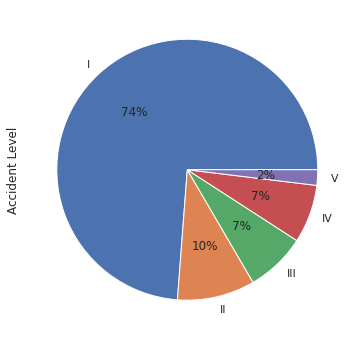

In [49]:
# Checking 5 random Descriptions and accident_levels from the data where the length of headline is > 100
print('--'*55); print('Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100'); print('--'*55)
indexes = list(df.loc[df['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, accident_levels = list(df.loc[rands, 'Description']), list(df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

print('--'*40); print('Distributon of accident_level where the length of Description is > 100'); print('--'*40)
_ = df.loc[indexes, 'Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['I', 'II', 'III', 'IV', 'V'], figsize = (10, 6))


**Observations**

- 74% of data where accident description > 100 is captured in low accident level. 
- Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
- There are few alphanumeric characters like 042-TC-06, Nv. 3370, CX 212 captured in description where removing these characters might help.
- There are digits in the description for e.g. level 326, Dumper 01 where removing the digits wouldn't help.

------------------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and pot_accident_levels from the data where the length of Description is > 100
------------------------------------------------------------------------------------------------------------------------
Description: Mr. Jesus operator of the concrete throwing team (alpha N ° 18) was shooting shotcrete in the Cx work. 001 Nv. 1710 OB1. applying 0.5 m3, he realizes that the additive did not come out in the mix, directing to lift the cover of the passage valve (54 Cm x 53 Cm of ¼ inch of thickness approximately 15 Kg). verifying that the valve was open, release the lid and it hits to the third finger of the left hand against the base, causing the injury.
pot_accident_level: IV

Description: When the mechanical technician proceeded to perform the maintenance of motor supports of a tipper, he decided to bring a wooden block, for which he moved 

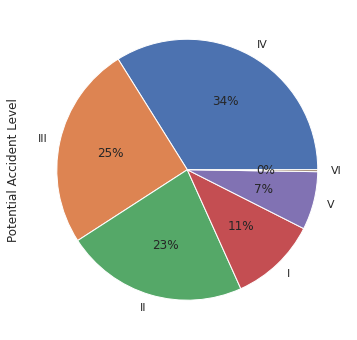

In [50]:
# Checking 5 random Descriptions and pot_accident_levels from the data where the length of headline is > 100
print('--'*60); print('Checking 5 random Descriptions and pot_accident_levels from the data where the length of Description is > 100'); print('--'*60)
indexes = list(df.loc[df['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, pot_accident_levels = list(df.loc[rands, 'Description']), list(df.loc[rands, 'Potential Accident Level'])

_ = [print(f'Description: {descriptin}\npot_accident_level: {pot_acclevel}\n') for descriptin, pot_acclevel in zip(descriptions, pot_accident_levels)]

print('--'*40); print('Distributon of pot_accident_level where the length of Description is > 100'); print('--'*40)
_ = df.loc[indexes, 'Potential Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['IV', 'III', 'II', 'I', 'V', 'VI'], figsize = (10, 6))


**Observations**

- 34% of data where accident description > 100 is captured in high medium potential accident level.
- 25% of data where accident description > 100 is captured in medium potential accident level.
- 23% of data where accident description > 100 is captured in low potential accident level. 
- Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
- There are few alphanumeric characters like AFO-755 captured in description where removing these characters might help.
- There are digits in the description for e.g. ditch 3570, 0.50 cm deep, 30 kg where removing the digits wouldn't help.

<a id="nlp-pre-processing"></a>
## 8. NLP Pre-processing

Few of the NLP pre-processing steps taken before applying model on the data

- Converting to lower case, avoid any capital cases
- Converting apostrophe to the standard lexicons
- Removing punctuations
- Lemmatization
- Removing stop words

In [51]:
import nltk; 
nltk.download('wordnet');
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string


nltk.download('averaged_perceptron_tagger')

appos = {"ain't": "am not", "aren't": "are not", "can't": "cannot", 
         "can't've": "cannot have", "'cause": "because", 
         "could've": "could have", "couldn't": "could not", 
         "couldn't've": "could not have", "didn't": "did not", 
         "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
         "hadn't've": "had not have", "hasn't": "has not", 
         "haven't": "have not", "he'd": "he would", "he'd've": "he would have", 
         "he'll": "he will", "he'll've": "he will have", 
         "he's": "he is", "how'd": "how did", 
         "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
         "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
         "I'll've": "I will have", "I'm": "I am", "I've": "I have", 
         "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
         "it'll": "it will", "it'll've": "it will have", "it's": "it is", 
         "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
         "might've": "might have", "mightn't": "might not", 
         "mightn't've": "might not have", "must've": "must have", 
         "mustn't": "must not", "mustn't've": "must not have", 
         "needn't": "need not", "needn't've": "need not have",
         "o'clock": "of the clock", "oughtn't": "ought not", 
         "oughtn't've": "ought not have", "shan't": "shall not", 
         "sha'n't": "shall not", "shan't've": "shall not have", 
         "she'd": "she would", "she'd've": "she would have", 
         "she'll": "she will", "she'll've": "she will have",
         "she's": "she is", "should've": "should have", 
         "shouldn't": "should not", "shouldn't've": "should not have", 
         "so've": "so have", "so's": "so is", 
         "that'd": "that had", "that'd've": "that would have", 
         "that's": "that that is", "there'd": "there would", 
         "there'd've": "there would have", "there's": "there is", 
         "they'd": "they would", "they'd've": "they would have", 
         "they'll": "they will", "they'll've": "they will have", 
         "they're": "they are", "they've": "they have", 
         "to've": "to have", "wasn't": "was not", "we'd": "we would", 
         "we'd've": "we would have", "we'll": "we will", 
         "we'll've": "we will have", "we're": "we are", 
         "we've": "we have", "weren't": "were not", 
         "what'll": "what will", "what'll've": "what will have", 
         "what're": "what are", "what's": "what is", 
         "what've": "what have", "when's": "when is", 
         "when've": "when have", "where'd": "where did", 
         "where's": "where is", "where've": "where have", 
         "who'll": "who will", "who'll've": "who will have", 
         "who's": "who is", "who've": "who have", 
         "why's": "why is", "why've": "why have", "will've": "will have", 
         "won't": "will not", "won't've": "will not have",
         "would've": "would have", "wouldn't": "would not", 
         "wouldn't've": "would not have", "y'all": "you all", 
         "y'all'd": "you all would", "y'all'd've": "you all would have", 
         "y'all're": "you all are", "y'all've": "you all have", 
         "you'd": "you would", "you'd've": "you would have",
         "you'll": "you will", "you'll've": "you will have", 
         "you're": "you are", "you've": "you have"}

# Helper function to replace appos
def replace_words(description):
    cleaned_description = []
    for word in str(description).split():
        if word.lower() in appos.keys():
            cleaned_description.append(appos[word.lower()])
        else:
            cleaned_description.append(word)
    return ' '.join(cleaned_description)

# Helper function to remove punctuations
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' #string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Helper function to lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ''.join([lemmatizer.lemmatize(word) for word in text])

# Helper function to remove stopwords
stoplist = set(stopwords.words('english'))
stoplist.update(('cm', 'kg', 'mr', 'wa' ,'nv', 'ore', 'da', 'pm', 'am', 'cx'))
stoplist.remove('not')
def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stoplist])

# Helper function for wordcloud
def plot_wordcloud(text, mask = None, max_words = 500, max_font_size = 40, 
                   figure_size = (12, 6), title = None, title_size = 15):
    wordcloud = WordCloud(background_color = 'white', max_words = max_words,
                          random_state = 42, width = 350, height = 150, 
                          mask = mask, stopwords = stoplist, collocations = False)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    plt.imshow(wordcloud, interpolation = 'bilinear');
    plt.title(title, fontdict = {'size': title_size, 'color': 'black', 
                               'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

# Second helper function for lemmatizing
lemmatizer = WordNetLemmatizer()
def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [52]:
print('--'*30); print('Converting description to lower case')
df['Cleaned_Description'] = df['Description'].apply(lambda x : x.lower())

print('Replacing apostrophes to the standard lexicons')
df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x : replace_words(x))

print('Removing punctuations')
df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x: remove_punctuation(x))

print('Applying Lemmatizer')
df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x: lemmatize(x))

print('Removing multiple spaces between words')
df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))

print('Removing stop words')
df['Cleaned_Description'] = df['Cleaned_Description'].apply(lambda x: remove_stopwords(x))

print('--'*30)

------------------------------------------------------------
Converting description to lower case
Replacing apostrophes to the standard lexicons
Removing punctuations
Applying Lemmatizer
Removing multiple spaces between words
Removing stop words
------------------------------------------------------------


#### Get the Length of each line and find the maximum length

As different lines are of different length. We need to pad the our sequences using the max length.

In [53]:
print('--'*45); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 64 to 672.'); print('--'*45)

# Get length of each line
df['line_length'] = df['Cleaned_Description'].str.len()

print('Minimum line length: {}'.format(df['line_length'].min()))
print('Maximum line length: {}'.format(df['line_length'].max()))
print('Line with maximum length: {}'.format(df[df['line_length'] == df['line_length'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 64 to 672.
------------------------------------------------------------------------------------------
Minimum line length: 64
Maximum line length: 680
Line with maximum length: level 3490 gallery 239 holding activity bolter equipment 24 operator performs drilling first hole support right gable 7footdeep drill end drill rod breaks leaving threads inside drilling machines shank operator assistant decide make two empty percussion attempts free threads shank without success third attempt assistant enters 38 corrugated iron central hole rest bar embedded shank generate pressure moment operator activates percussion generates movement shank hits palm victims left hand generating described injury worker wearing safety gloves time accident end corrugated iron contact left hand shaped like cane

In [54]:
print('--'*45); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 10 to 98.'); print('--'*45)

# Get length of each line
df['nb_words'] = df['Cleaned_Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(df['nb_words'].min()))
print('Maximum number of words: {}'.format(df['nb_words'].max()))
print('Line with maximum number of words: {}'.format(df[df['nb_words'] == df['nb_words'].max()]['Cleaned_Description'].values[0]))

------------------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 10 to 98.
------------------------------------------------------------------------------------------
Minimum number of words: 10
Maximum number of words: 98
Line with maximum number of words: performing sleeve removal maneuver hole 600 meters deep general silva pressed one side locking nut rods together jack holds entire weight rods maneuver locking procedure not effective weight rods secured steel wire rope probe winch moment driller pedro released brake winch inefficacy locking done one side chestnut without aid monkey caused sliding rods auxiliary prepared manual unlocking rods holding faucet key firmly probe tower composition shifted stems slid hands shifted downward causing left hand strike base probe tower structure causing cuts 4th 5th quirodactyl employee taken hospi

<a id="wordcloud"></a>
#### WordCloud

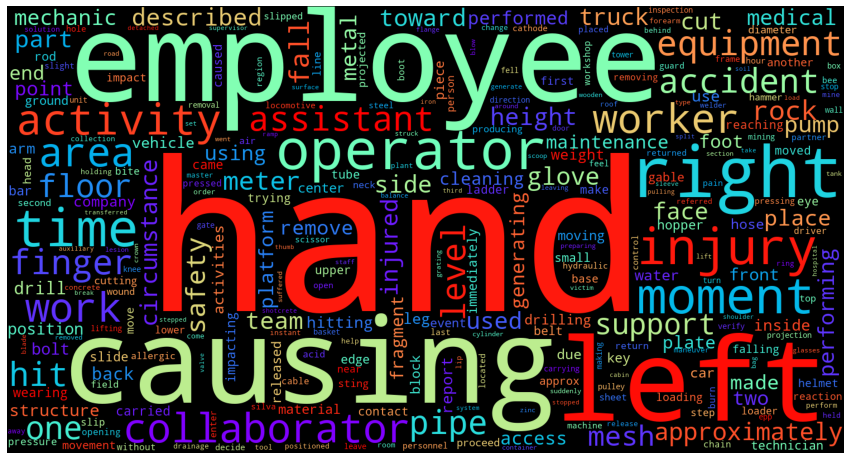

In [55]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(df['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observations**

There are many body-related, employee related, movement-related, equipment-related and accident-related words.

* Body-related: left, right, hand, finger, face, foot and glove
* Employee-related: employee, operator, collaborator, assistant, worker and mechanic
* Movement-related: fall, hit, lift and slip
* Equipment-related: equipment, pump, meter, drill, truck and tube
* Accident-related: accident, activity, safety, injury, causing


#### NLP text summary statistics

In [56]:
print('--'*30); print('Five point summary for number of words')
display(df['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(df['nb_words'].quantile(0.99)));print('--'*30)

------------------------------------------------------------
Five point summary for number of words


count    418
mean      34
std       16
min       10
25%       21
50%       31
75%       43
max       98
Name: nb_words, dtype: int64

99% quantilie: 83.65999999999997
------------------------------------------------------------


## NLP Pre-processing Summary:

- 74% of data where accident description > 100 is captured in low accident level.
- 34% of data where accident description > 100 is captured in high medium potential accident level.
- 25% of data where accident description > 100 is captured in medium potential accident level.
- 23% of data where accident description > 100 is captured in low potential accident level. 
- Few of the NLP pre-processing steps taken before applying model on the data

  - Converting to lower case, avoid any capital cases
  - Converting apostrophe to the standard lexicons
  - Removing punctuations
  - Lemmatization
  - Removing stop words

- After pre-processing steps:
  - Minimum line length: 64
  - Maximum line length: 672
  - Minimum number of words: 10
  - Maximum number of words: 98

## 9. Feature Engineering

#### Variable Creation - Word2Vec Embeddings

In [57]:
# define training data
sentences = df['Cleaned_Description']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=48, vector_size=100, alpha=0.025>
[' ', 'e', 'i', 't', 'r', 'a', 'n', 'o', 's', 'l', 'c', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'b', 'y', 'v', 'k', 'w', '0', '1', 'x', 'j', '2', '5', '4', '3', 'q', '8', '7', '6', 'z', '9', '\u200b', '°', 'á', 'é', 'ã', 'ó', 'â', 'í', '¼', 'ô', 'ú']
Word2Vec<vocab=48, vector_size=100, alpha=0.025>


#### Variable Creation - Glove Word Embeddings

In [58]:
embeddings_index = {}
EMBEDDING_FILE = path_name + '/glove.6B.200d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:33, 11883.29it/s]

Found 400000 word vectors.


In [59]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [60]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(df['Cleaned_Description'])]

100%|██████████| 418/418 [00:00<00:00, 1125.36it/s]


In [61]:
ind_glove_df[0]

array([ 1.39856245e-03,  8.99862126e-02,  1.08799164e-03, -3.09016760e-02,
        6.19197078e-03,  6.87033385e-02, -1.02347635e-01, -2.87667587e-02,
       -6.25691786e-02,  4.17288505e-02, -1.61288977e-02,  1.33184874e-02,
        1.12336598e-01,  1.67398853e-03,  8.71078447e-02, -1.93325020e-02,
       -3.66557874e-02, -2.86911987e-02,  7.09104389e-02,  8.07439629e-03,
       -4.30122279e-02,  6.14812076e-01,  9.06249657e-02,  1.87851384e-03,
        3.43448929e-02,  3.48158218e-02, -3.08507830e-02,  2.58244704e-02,
       -3.18089649e-02, -6.93444610e-02,  5.13918102e-02, -4.53802906e-02,
        1.09138573e-02, -1.77216530e-02,  1.88153088e-02, -3.13805038e-04,
       -8.93176496e-02, -6.43905252e-02, -7.05620348e-02,  4.99016382e-02,
        6.68967739e-02,  3.37204821e-02, -1.01575870e-02,  6.47136495e-02,
        3.32460664e-02,  6.59773797e-02,  4.91438136e-02,  2.39142426e-03,
        4.29478846e-02,  7.00706914e-02,  3.60498391e-02,  1.07721733e-02,
       -5.63761368e-02, -

#### Variable Creation - TFIDF Features

In [62]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(df['Cleaned_Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TFIDF_activity  TFIDF_area  TFIDF_causing  TFIDF_employee  TFIDF_hand  \
0             0.0     0.00000       0.000000             0.0    0.000000   
1             0.0     1.00000       0.000000             0.0    0.000000   
2             0.0     0.55361       0.383117             0.0    0.413742   

   TFIDF_injury  TFIDF_left  TFIDF_operator  TFIDF_right  TFIDF_time  ...  \
0      0.000000    0.000000             0.0          0.0         0.0  ...   
1      0.000000    0.000000             0.0          0.0         0.0  ...   
2      0.460892    0.403897             0.0          0.0         0.0  ...   

   TFIDF_causing injury described  TFIDF_described time accident  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   

   TFIDF_generating described injury  TFIDF_hand causing injury  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   

   TFIDF_injury time accident  TFIDF_left hand causing  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   

   TFIDF_right hand causing  TFIDF_time accident employee  
0                       0.0                           0.0  
1                       0.0                           0.0  
2                       0.0                           0.0  

[3 rows x 30 columns]

#### Variable Creation - Label Encoding

In [63]:
# To replace white space everywhere in Employee type
df['Employee type'] = df['Employee type'].str.replace(' ', '_')
df['Employee type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: Employee type, dtype: int64

In [64]:
# To replace white space everywhere in Critical Risk
df['Critical Risk'] = df['Critical Risk'].str.replace('\n', '').str.replace(' ', '_')
df['Critical Risk'].value_counts().head()

Others                 229
Pressed                 24
Manual_Tools            20
Chemical_substances     17
Cut                     14
Name: Critical Risk, dtype: int64

In [65]:
# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
df['Season'] = df['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
ind_featenc_df['Season'] = LabelEncoder().fit_transform(df['Season']).astype(np.int8)

df['Weekday'] = df['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(df['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(df['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(df['Potential Accident Level']).astype(np.int8)

In [66]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(ind_featenc_df['Accident Level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [67]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = df[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...  CR_Projection  \
0                         3           0           0  ...              0   
1                         3           1           0  ...              0   
2                         2           0           0  ...              0   

   CR_Projection/Burning  CR_Projection/Choco  CR_Projection/Manual_Tools  \
0                      0                    0                           0   
1                      0                    0                           0   
2                      0                    0                           0   

   CR_Projection_of_fragments  CR_Suspended_Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   

   CR_Vehicles_and_Mobile_Equipment  CR_Venomous_Animals  CR_remains_of_choco  
0                                 0                    0                    0  
1                                 0                    0                    0  
2                                 0                    0                    0  

[3 rows x 58 columns]

In [68]:
# Check NaN values
np.any(np.isnan(ind_featenc_df))

False

#### Combine Glove and Encoded Features

In [69]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [70]:
ind_feat_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...        20        21  \
0                         3           0           0  ... -0.043012  0.614812   
1                         3           1           0  ... -0.107699  0.564138   
2                         2           0           0  ... -0.008735  0.582276   

         22        23        24        25        26        27        28  \
0  0.090625  0.001879  0.034345  0.034816 -0.030851  0.025824 -0.031809   
1 -0.058079 -0.074854  0.115027 -0.104237 -0.077160  0.004913  0.001651   
2  0.069600 -0.024584  0.052616  0.001921 -0.020729 -0.004270 -0.085750   

         29  
0 -0.069344  
1  0.051122  
2 -0.091348  

[3 rows x 88 columns]

#### Combine TFIDF and Encoded Features

In [71]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))

In [72]:
ind_feat_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...  \
0                         3           0           0  ...   
1                         3           1           0  ...   
2                         2           0           0  ...   

   TFIDF_causing injury described  TFIDF_described time accident  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   

   TFIDF_generating described injury  TFIDF_hand causing injury  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   

   TFIDF_injury time accident  TFIDF_left hand causing  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   

   TFIDF_right hand causing  TFIDF_time accident employee  
0                       0.0                           0.0  
1                       0.0                           0.0  
2                       0.0                           0.0  

[3 rows x 88 columns]

#### Sampling Techniques - Create Training and Test Set

In [73]:
X = ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Accident Level']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [75]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)

In [76]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,86)
y_train shape : (334,)
X_test shape : (84,86)
y_test shape : (84,)


#### Resampling Techniques — Oversample minority class

In [77]:
# Display old accident level counts
ind_feat_df['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [78]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_0_majority = X_up[X_up['Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Accident Level'] == 2]
acclevel_3_minority = X_up[X_up['Accident Level'] == 3]
acclevel_4_minority = X_up[X_up['Accident Level'] == 4]

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
acclevel_3_minority_upsampled = resample(acclevel_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

In [79]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_0_majority, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, acclevel_3_minority_upsampled, 
                          acclevel_4_minority_upsampled])

In [80]:
# Display new accident level counts
df_upsampled['Accident Level'].value_counts()

0    247
1    247
2    247
3    247
4    247
Name: Accident Level, dtype: int64

In [81]:
# Separate input features and target
X_train_up = df_upsampled.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']

#### SMOTE - Generate synthetic samples - upsample smaller class

In [82]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
df_smote.columns = ['Year', 'Month', 'Day',
        'WeekofYear', 'Season', 'Weekday',
       'Country_02', 'Country_03', 'Local_02', 'Local_03', 'Local_04',
       'Local_05', 'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10',
       'Local_11', 'Local_12', 'Male', 'IS_Mining', 'IS_Others',
       'EmpType_Third_Party', 'EmpType_Third_Party_(Remote)',
       'CR_Blocking_and_isolation_of_energies', 'CR_Burn',
       'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Projection_of_fragments',
       'CR_Suspended_Loads', 'CR_Traffic', 'CR_Vehicles_and_Mobile_Equipment',
       'CR_Venomous_Animals', 'CR_remains_of_choco', 'TFIDF_activity', 'TFIDF_area',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_operator', 'TFIDF_right', 'TFIDF_time',
       'TFIDF_causing injury', 'TFIDF_described injury',
       'TFIDF_employee reports', 'TFIDF_finger left', 'TFIDF_injury described',
       'TFIDF_left foot', 'TFIDF_left hand', 'TFIDF_medical center',
       'TFIDF_right hand', 'TFIDF_time accident',
       'TFIDF_causing injury described', 'TFIDF_described time accident',
       'TFIDF_finger left hand', 'TFIDF_finger right hand',
       'TFIDF_generating described injury', 'TFIDF_hand causing injury',
       'TFIDF_injury time accident', 'TFIDF_left hand causing',
       'TFIDF_right hand causing', 'TFIDF_time accident employee', 'Accident Level']

In [83]:
# Separate input features and target
X_train_smote = df_smote.iloc[:,:-1] # Considering all Predictors
y_train_smote = df_smote.iloc[:,-1:]

In [84]:
X_train_smote.head(1)

Year  Month  Day  WeekofYear  Season  Weekday  Country_02  Country_03  \
0  2016      9    1          35       3        3           1           0   

   Local_02  Local_03  ...  TFIDF_causing injury described  \
0         0         0  ...                             0.0   

   TFIDF_described time accident  TFIDF_finger left hand  \
0                            0.0                     0.0   

   TFIDF_finger right hand  TFIDF_generating described injury  \
0                      0.0                                0.0   

   TFIDF_hand causing injury  TFIDF_injury time accident  \
0                        0.0                         0.0   

   TFIDF_left hand causing  TFIDF_right hand causing  \
0                      0.0                       0.0   

   TFIDF_time accident employee  
0                           0.0  

[1 rows x 86 columns]

In [85]:
# Display new accident level counts
y_train_smote['Accident Level'].value_counts()

1    247
0    247
3    247
2    247
4    247
Name: Accident Level, dtype: int64

In [86]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_smote_dummy = np_utils.to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

#### Varible Tansformation (Normalization and Scaling)

In [87]:
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres

X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres

In [88]:
X_train.head(3)

Year     Month       Day  WeekofYear    Season   Weekday  Country_02  \
202 -0.700765  1.168926 -1.673853    0.996914  1.728348  0.075496           1   
258 -0.700765  1.802213  1.559083    1.934247  1.728348 -0.997510           1   
6   -0.700765 -1.364221  0.058077   -1.382469 -1.221916  1.148501           1   

     Country_03  Local_02  Local_03  ...  TFIDF_causing injury described  \
202           0         0         0  ...                             0.0   
258           0         0         0  ...                             0.0   
6             0         0         0  ...                             0.0   

     TFIDF_described time accident  TFIDF_finger left hand  \
202                            0.0                     0.0   
258                            0.0                     0.0   
6                              0.0                     0.0   

     TFIDF_finger right hand  TFIDF_generating described injury  \
202                      0.0                                0.0   
258                      0.0                                0.0   
6                        0.0                                0.0   

     TFIDF_hand causing injury  TFIDF_injury time accident  \
202                        0.0                         0.0   
258                        0.0                         0.0   
6                          0.0                         0.0   

     TFIDF_left hand causing  TFIDF_right hand causing  \
202                      0.0                       0.0   
258                      0.0                       0.0   
6                        0.0                       0.0   

     TFIDF_time accident employee  
202                           0.0  
258                           0.0  
6                             0.0  

[3 rows x 86 columns]

#### Use PCA - Extract Principal Components that capture about 95% of the variance in the data

In [89]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -2.06945085e-03
  -4.89406968e-03 -5.68968778e-03]
 [-4.24727770e-01  1.00300300e+00  2.68776694e-02 ...  7.08759577e-03
   4.65172198e-03  5.42953855e-03]
 [ 2.53271550e-02  2.68776694e-02  1.00300300e+00 ... -1.28805019e-03
  -5.08213127e-03 -3.28488592e-03]
 ...
 [-2.06945085e-03  7.08759577e-03 -1.28805019e-03 ...  6.86698871e-03
  -7.05215662e-05 -1.74059396e-04]
 [-4.89406968e-03  4.65172198e-03 -5.08213127e-03 ... -7.05215662e-05
   5.61025313e-03 -1.20024227e-04]
 [-5.68968778e-03  5.42953855e-03 -3.28488592e-03 ... -1.74059396e-04
  -1.20024227e-04  1.63635526e-02]]
Eigenvectors 
[[-3.52848651e-01 -5.95190322e-03  2.45569047e-01 ...  5.71227628e-16
  -3.51651406e-17  0.00000000e+00]
 [ 5.64490875e-01  2.14076816e-02  1.53603616e-02 ...  4.35543056e-16
   1.12849107e-15  0.00000000e+00]
 [ 2.64301524e-02  6.24916616e-01  7.40100622e-01 ... -3.71016802e-17
   3.59076166e-17  0.00000000e+00]
 ...
 [ 3.159

In [90]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.99922478  40.28178824  50.25853388  58.22777673  64.00374413
  68.92991348  72.97702737  75.278389    77.16679249  78.99822186
  80.5516056   81.98239544  83.23007776  84.42662301  85.4175337
  86.369935    87.21343161  88.01851129  88.76791269  89.46856403
  90.11624836  90.71778334  91.29150158  91.83878164  92.33525963
  92.76492217  93.18871353  93.55952644  93.92254342  94.27180858
  94.59331254  94.90894975  95.19471368  95.46867378  95.73439484
  95.97735724  96.21648068  96.44707124  96.65031552  96.8498666
  97.04404075  97.22923753  97.40595474  97.57469201  97.73799604
  97.89662732  98.05126802  98.19277128  98.33010973  98.46049806
  98.58494837  98.70663182  98.80523781  98.89715145  98.98038321
  99.0624198   99.14174791  99.21246429  99.28037476  99.34403292
  99.40053439  99.45438009  99.50676837  99.5580343   99.6034291
  99.64541879  99.68108937  99.71285985  99.7425389   99.77105654
  99.79929815  99.82684952  99.85314185  99.87844

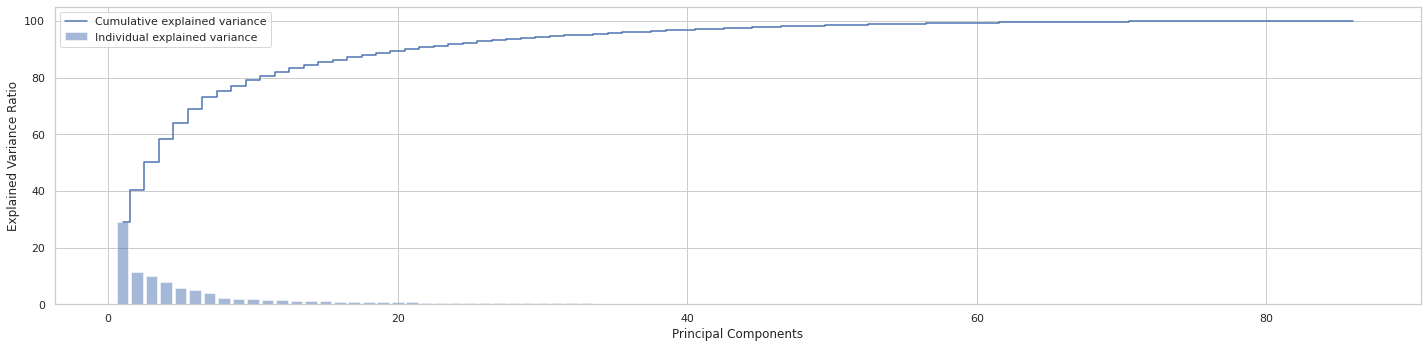

In [91]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [92]:
# Capturing 90% variance of the data
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [93]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 21)
(84, 21)


<a id="ml-models"></a>
## 10. Design, train and test machine learning classifiers

#### Here we can use the DummyClassifier to predict all accident levels just to show how misleading accuracy can be.

In [94]:
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0 1 2 3 4]
Test score:  0.5714285714285714


In [95]:
# Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

0    67
3     6
2     5
1     5
4     1
Name: 0, dtype: int64

#### Define MultiClass-Logloss

In [96]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

#### Train and test model

In [97]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr)

    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    
    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions

#### Train and test all models

In [98]:
import lightgbm as lgb

def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):

    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        #['Lasso',Lasso(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
                                         #early_stopping_rounds = 30)],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no')

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

#### 1. Modelling - Logistic Regression

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


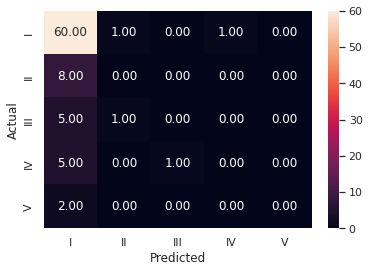

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.71        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.71      0.62        84



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.754491       0.714286   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.553571  0.714286  0.623742             0.894264

In [99]:
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression without Sampling', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

#### 2. Decision Tree - Random Forest Classifier

* While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


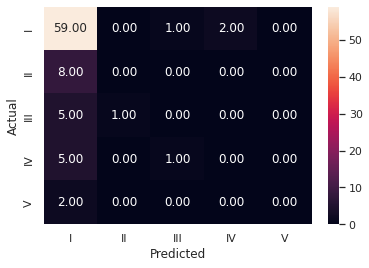

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.70        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.70      0.62        84



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.754491       0.714286   
2      Random Forest with original data        0.955090       0.702381   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.553571  0.714286  0.623742             0.894264  
2   0.551236  0.702381  0.617697             3.413944

In [100]:
# Building a Random Forest Classifier on Training set
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'Random Forest with original data', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rf_df])
resultsDf

#### 3. Modelling - Logistic Regression - Oversampling

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


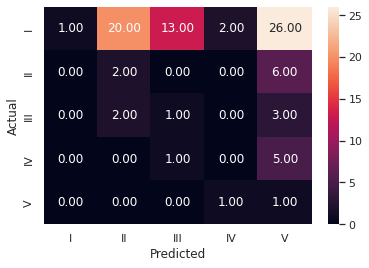

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        62
           1       0.08      0.25      0.12         8
           2       0.07      0.17      0.10         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.05         2

    accuracy                           0.06        84
   macro avg       0.23      0.19      0.06        84
weighted avg       0.75      0.06      0.04        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.754491       0.714286   
2      Random Forest with original data        0.955090       0.702381   
3     Logistic Regression with Sampling        0.395142       0.059524   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.553571  0.714286  0.623742             0.894264  
2   0.551236  0.702381  0.617697             3.413944  
3   0.751374  0.059524  0.043246             1.688812

In [101]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_df = train_test_model(lr, 'Logistic Regression with Sampling', X_train_up, X_test, y_train_up, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

#### 4. Modelling - Logistic Regression - SMOTE

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


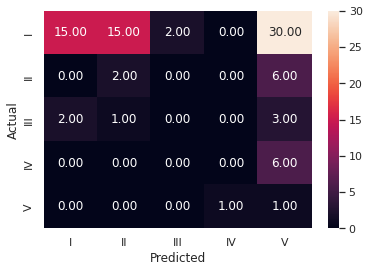

              precision    recall  f1-score   support

           0       0.88      0.24      0.38        62
           1       0.11      0.25      0.15         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.21        84
   macro avg       0.20      0.20      0.12        84
weighted avg       0.66      0.21      0.30        84



Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling        0.754491       0.714286   
2      Random Forest with original data        0.955090       0.702381   
3     Logistic Regression with Sampling        0.395142       0.059524   
4        Logistic Regression with SMOTE        0.443725       0.214286   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.553571  0.714286  0.623742             0.894264  
2   0.551236  0.702381  0.617697             3.413944  
3   0.751374  0.059524  0.043246             1.688812  
4   0.662360  0.214286  0.295933             1.653698

In [102]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

<a id="ml-models-original-data"></a>
#### All models - Original data

In [114]:
# Train and Test all models with Lasso interaction terms
result_all_original = train_test_allmodels(X_train, X_test, y_train, y_test, 'no')
result_all_original

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.754491       0.714286   0.553571   
2              RidgeClassifier        0.757485       0.726190   0.562798   
3         KNeighborsClassifier        0.739521       0.726190   0.601190   
4                          SVC        0.739521       0.738095   0.544785   
5       DecisionTreeClassifier        0.994012       0.607143   0.609599   
6       RandomForestClassifier        0.955090       0.702381   0.551236   
7            BaggingClassifier        0.964072       0.714286   0.553571   
8         ExtraTreesClassifier        0.994012       0.738095   0.551348   
9           AdaBoostClassifier        0.736527       0.726190   0.663004   
10  GradientBoostingClassifier        0.937126       0.690476   0.579683   
11              LGBMClassifier        0.991018       0.750000   0.657979   
12               XGBClassifier        0.832335       0.726190   0.585623   

      Recall  F1-Score  Multi-Class Logloss  
1   0.714286  0.623742             0.894264  
2   0.726190  0.634138             1.000000  
3   0.726190  0.642790             6.098855  
4   0.738095  0.626875             0.908922  
5   0.607143  0.606349            13.577057  
6   0.702381  0.617697             3.413944  
7   0.714286  0.623742             2.304895  
8   0.738095  0.631199             1.614468  
9   0.726190  0.653817             1.252899  
10  0.690476  0.629380             0.967223  
11  0.750000  0.695705             1.022555  
12  0.726190  0.646939             0.871171

By comparing the results from all above methods, we can select the best method as AdaBoost classifier with f1-score 65.38%

<a id="ml-models-oversampling-data"></a>
#### All models - Oversampling data

In [109]:
# Train and Test all models with Lasso interaction terms
result_all_oversample =train_test_allmodels(X_train_up, X_test, y_train_up, y_test, 'no')
result_all_oversample

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predict

Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.395142       0.059524   0.751374   
2              RidgeClassifier        0.799190       0.738095   0.544785   
3         KNeighborsClassifier        0.950607       0.250000   0.596057   
4                          SVC        0.289069       0.071429   0.005102   
5       DecisionTreeClassifier        0.998381       0.583333   0.652791   
6       RandomForestClassifier        0.998381       0.702381   0.637131   
7            BaggingClassifier        0.998381       0.702381   0.589697   
8         ExtraTreesClassifier        0.998381       0.702381   0.575015   
9           AdaBoostClassifier        0.356275       0.738095   0.544785   
10  GradientBoostingClassifier        0.963563       0.666667   0.672224   
11              LGBMClassifier        0.998381       0.714286   0.540070   
12               XGBClassifier        0.995142       0.738095   0.634226   

      Recall  F1-Score  Multi-Class Logloss  
1   0.059524  0.043246             1.688812  
2   0.738095  0.626875             1.000000  
3   0.250000  0.298241             8.882442  
4   0.071429  0.009524             1.601636  
5   0.583333  0.604478            14.391157  
6   0.702381  0.628391             3.131216  
7   0.702381  0.641106             1.641985  
8   0.702381  0.630616             1.672064  
9   0.738095  0.626875             1.236702  
10  0.666667  0.668098             0.997802  
11  0.714286  0.615079             1.208456  
12  0.738095  0.654546             0.881638

By comparing the results from all above methods, we can select best method as Ridge classifier with f1-score 62.68% and all other methods are over fitting the training data.

<a id="ml-models-smote-data"></a>
#### All models - SMOTE data

In [110]:
# Train and Test all models with Lasso interaction terms
result_all_smote = train_test_allmodels(X_train_smote, X_test, y_train_smote, y_test, 'no')
result_all_smote

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression        0.443725       0.214286   0.662360   
2              RidgeClassifier        0.791903       0.071429   0.005102   
3         KNeighborsClassifier        0.907692       0.154762   0.497024   
4                          SVC        0.295547       0.071429   0.005102   
5       DecisionTreeClassifier        0.998381       0.416667   0.518088   
6       RandomForestClassifier        0.995951       0.666667   0.615242   
7            BaggingClassifier        0.995142       0.595238   0.589683   
8         ExtraTreesClassifier        0.998381       0.642857   0.619700   
9           AdaBoostClassifier        0.542510       0.726190   0.555850   
10  GradientBoostingClassifier        0.964372       0.607143   0.619983   
11              LGBMClassifier        0.997571       0.690476   0.541893   
12               XGBClassifier        0.985425       0.595238   0.613985   

      Recall  F1-Score  Multi-Class Logloss  
1   0.214286  0.295933             1.653698  
2   0.071429  0.009524             1.000000  
3   0.154762  0.168746             8.948456  
4   0.071429  0.009524             1.617905  
5   0.416667  0.454445            20.147620  
6   0.666667  0.637530             2.447109  
7   0.595238  0.588342             2.539121  
8   0.642857  0.630075             1.443264  
9   0.726190  0.629704             1.311231  
10  0.607143  0.602237             1.087744  
11  0.690476  0.607227             1.055577  
12  0.595238  0.600153             1.083721

All models - Original data


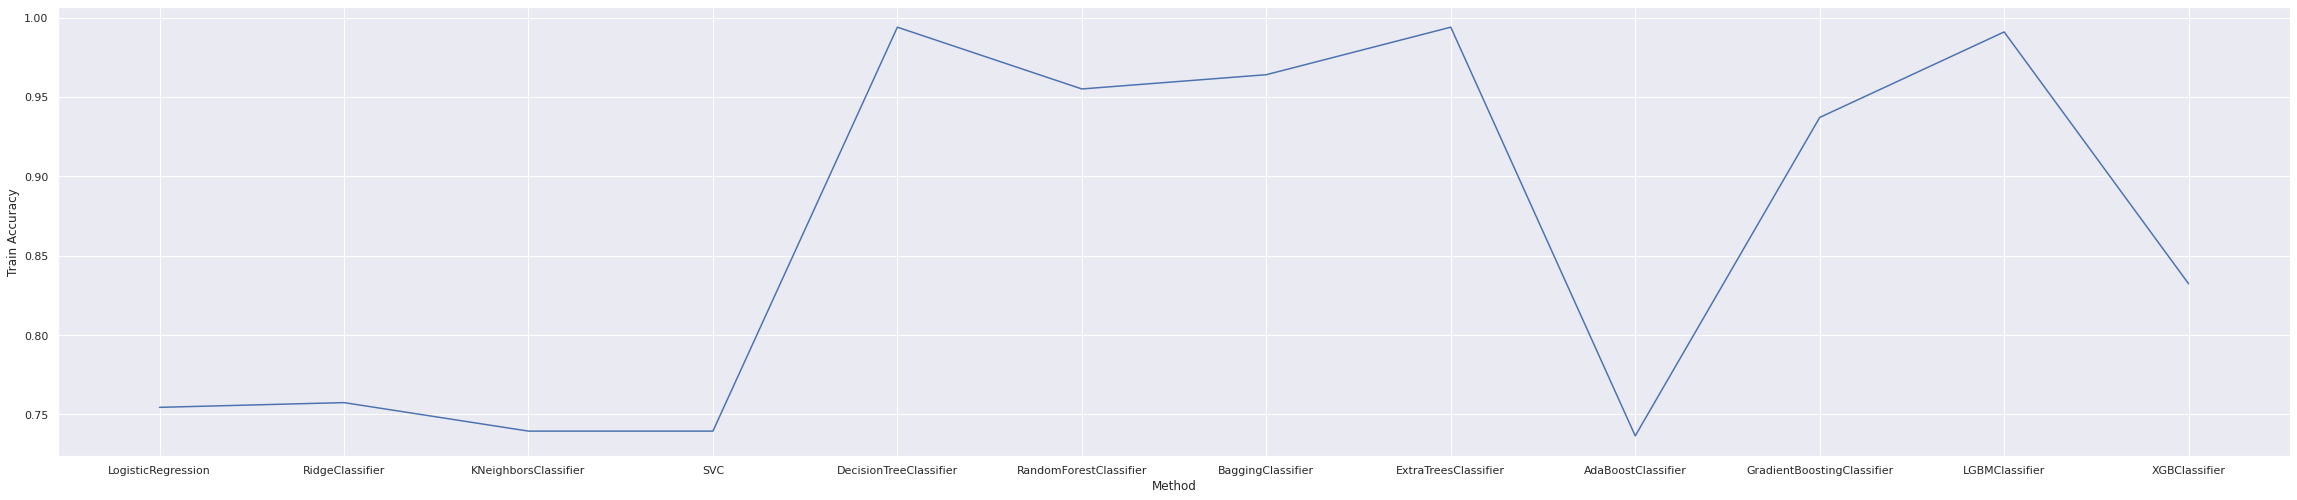

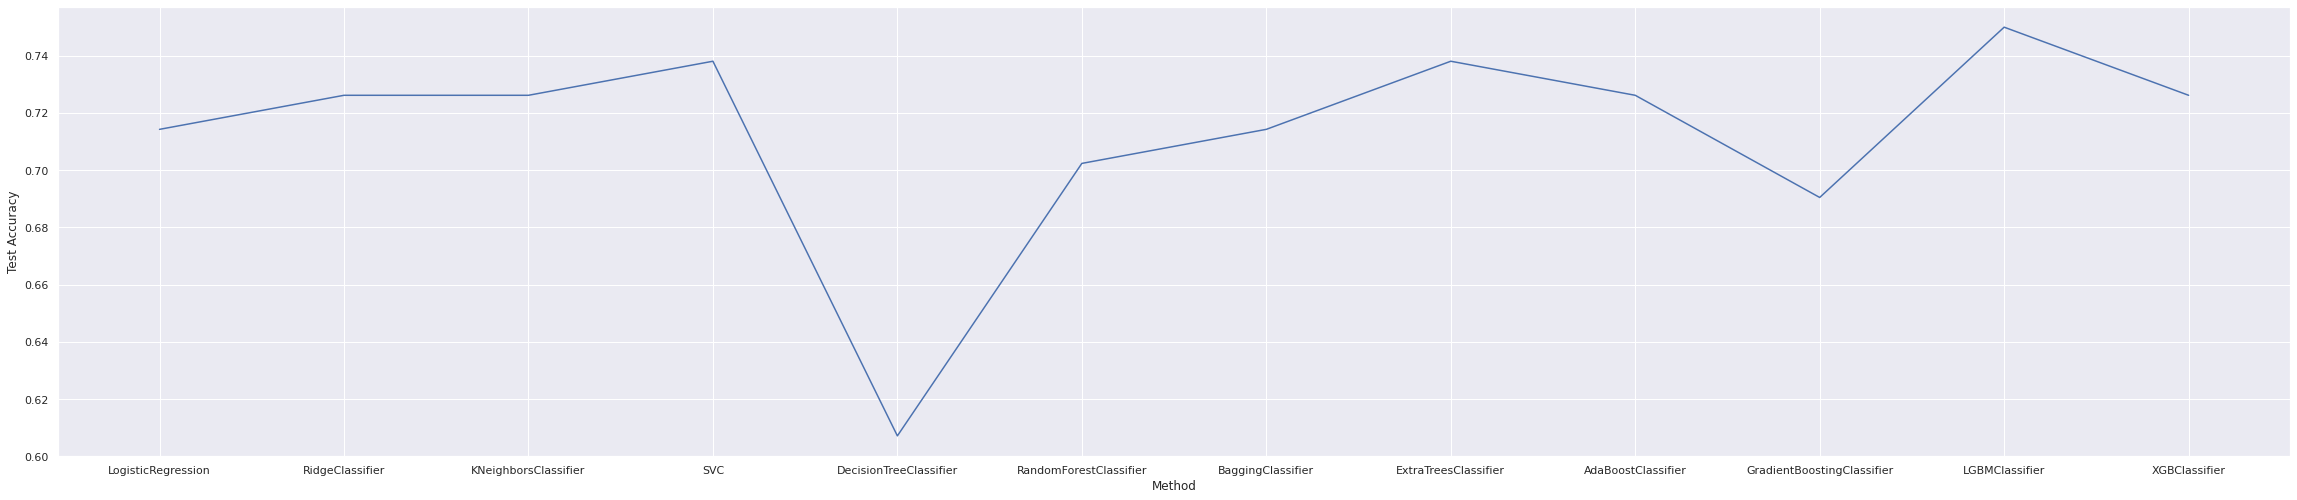

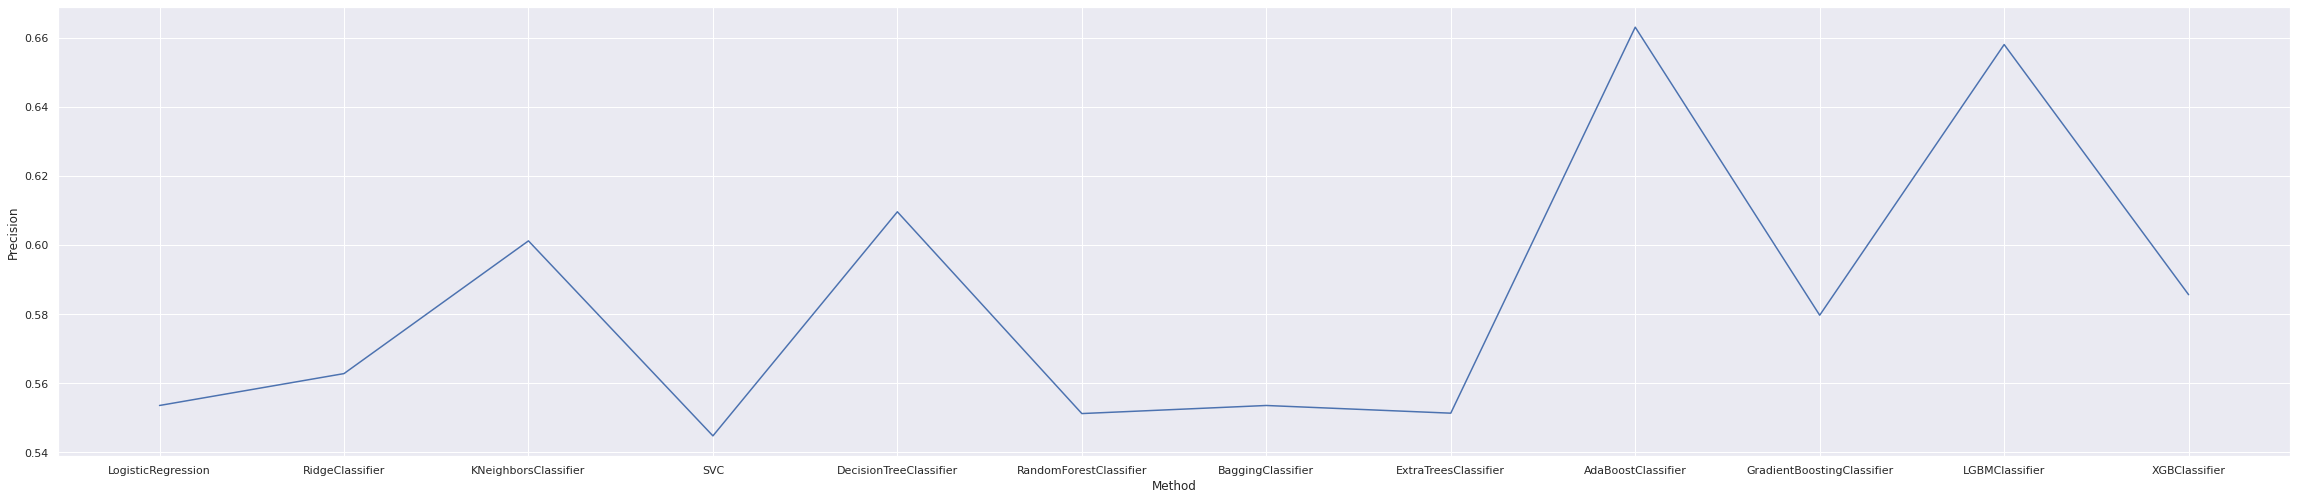

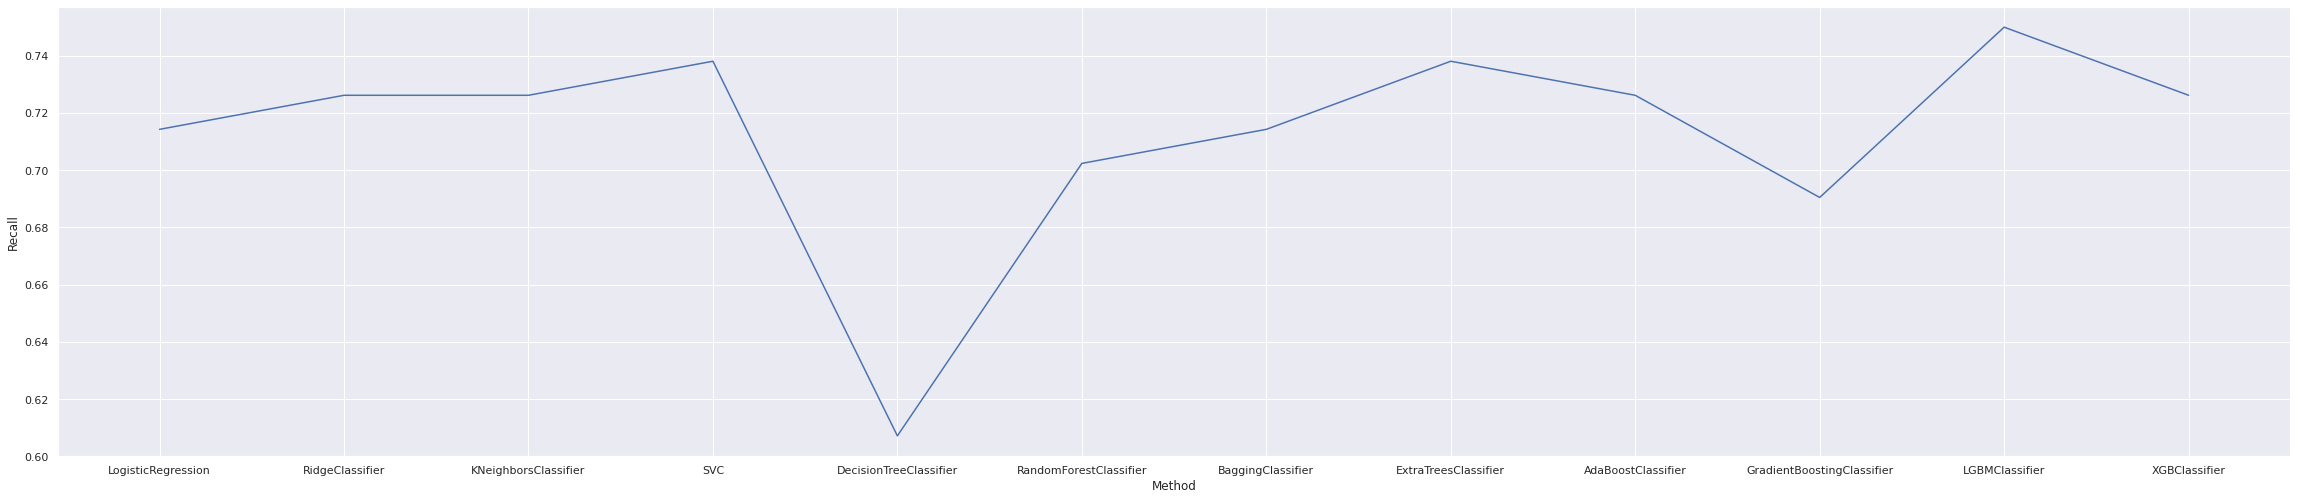

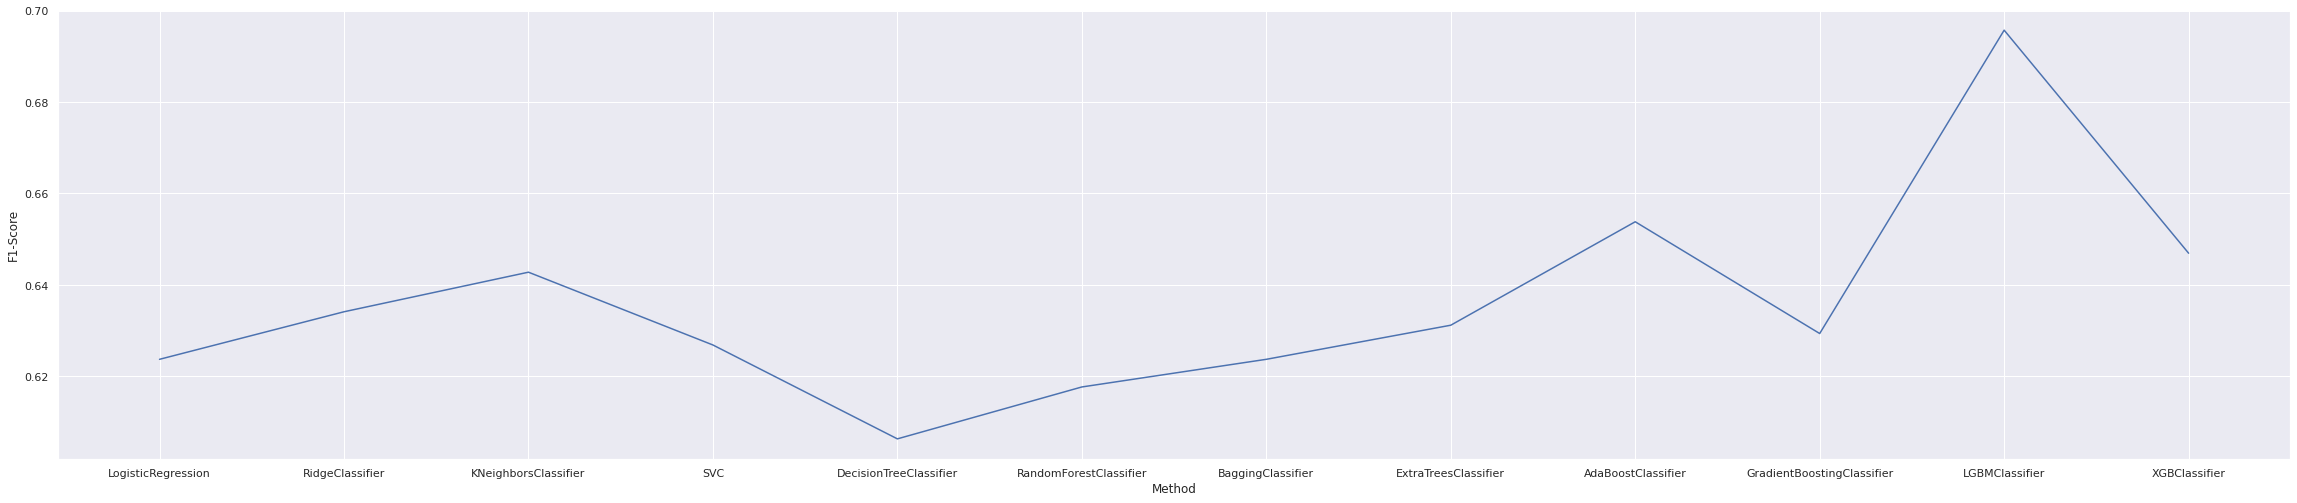

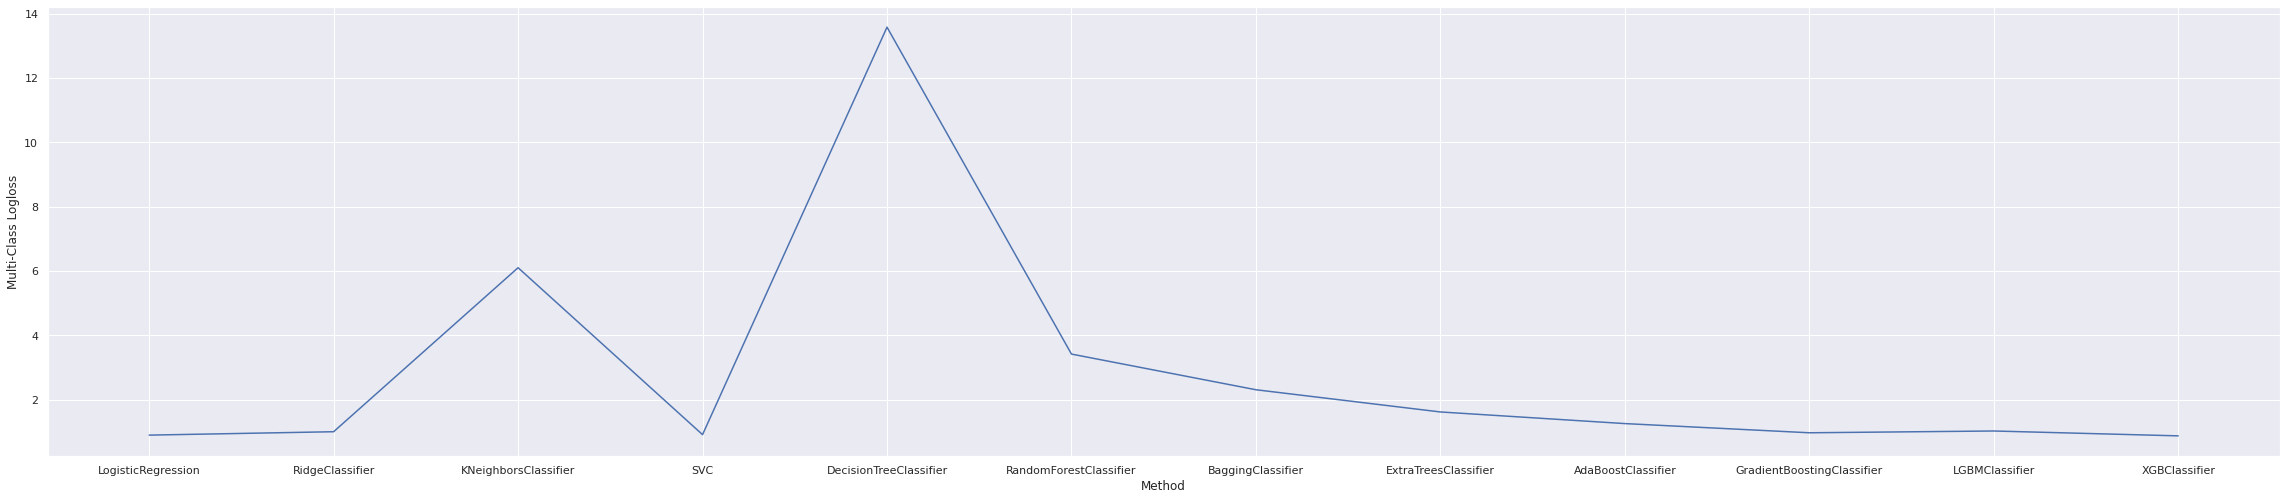

In [127]:
def plotResultData(result):
    params= ["Train Accuracy",	"Test Accuracy",	"Precision",	"Recall",	"F1-Score",	"Multi-Class Logloss"]
    for param in params: 
      sns.set_style("darkgrid")
      sns.set(rc={'figure.figsize':(40,8.27)})
      sns.lineplot(x="Method", dashes=False, y=param, data=result)
      plt.show()

print("All models - Original data")
plotResultData(result_all_original)

All models - Oversampling data


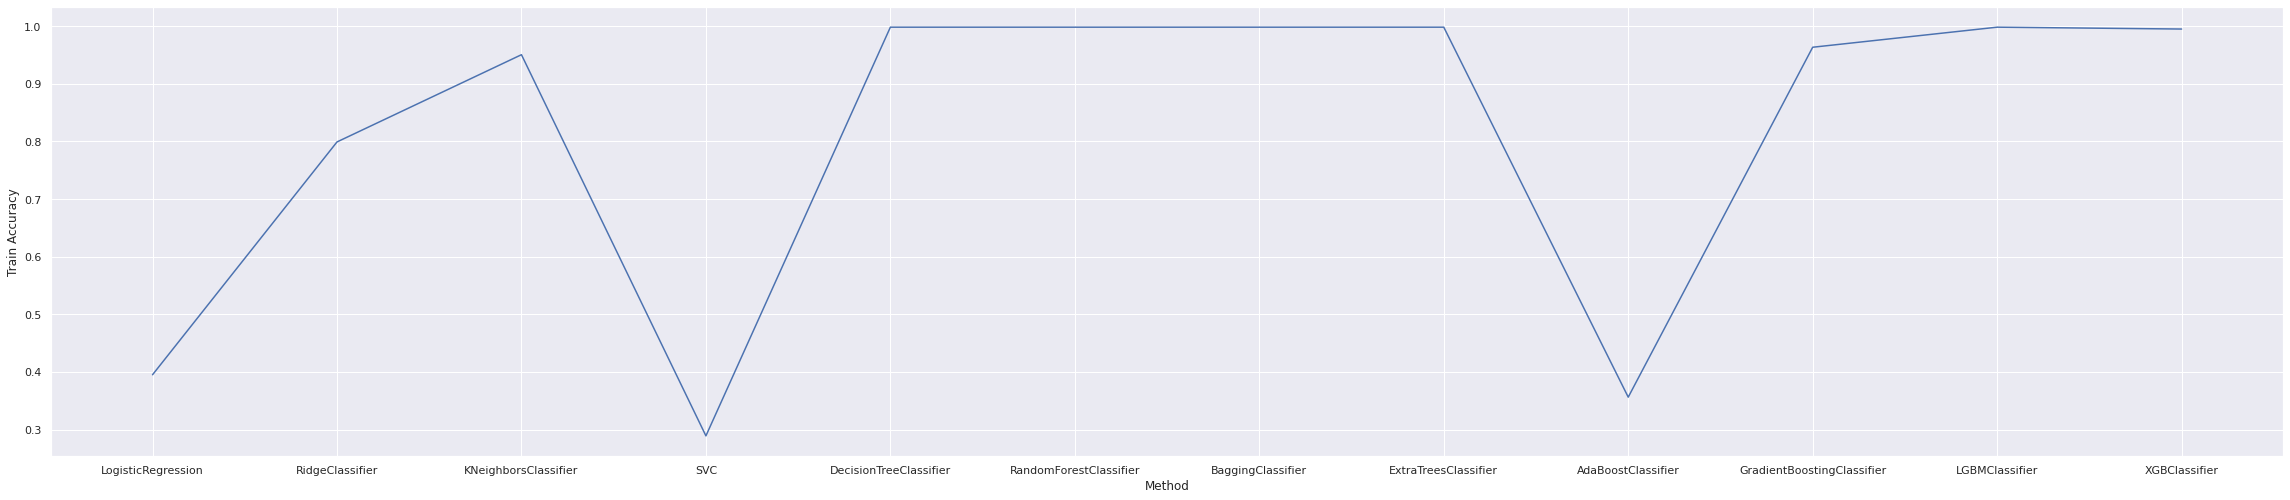

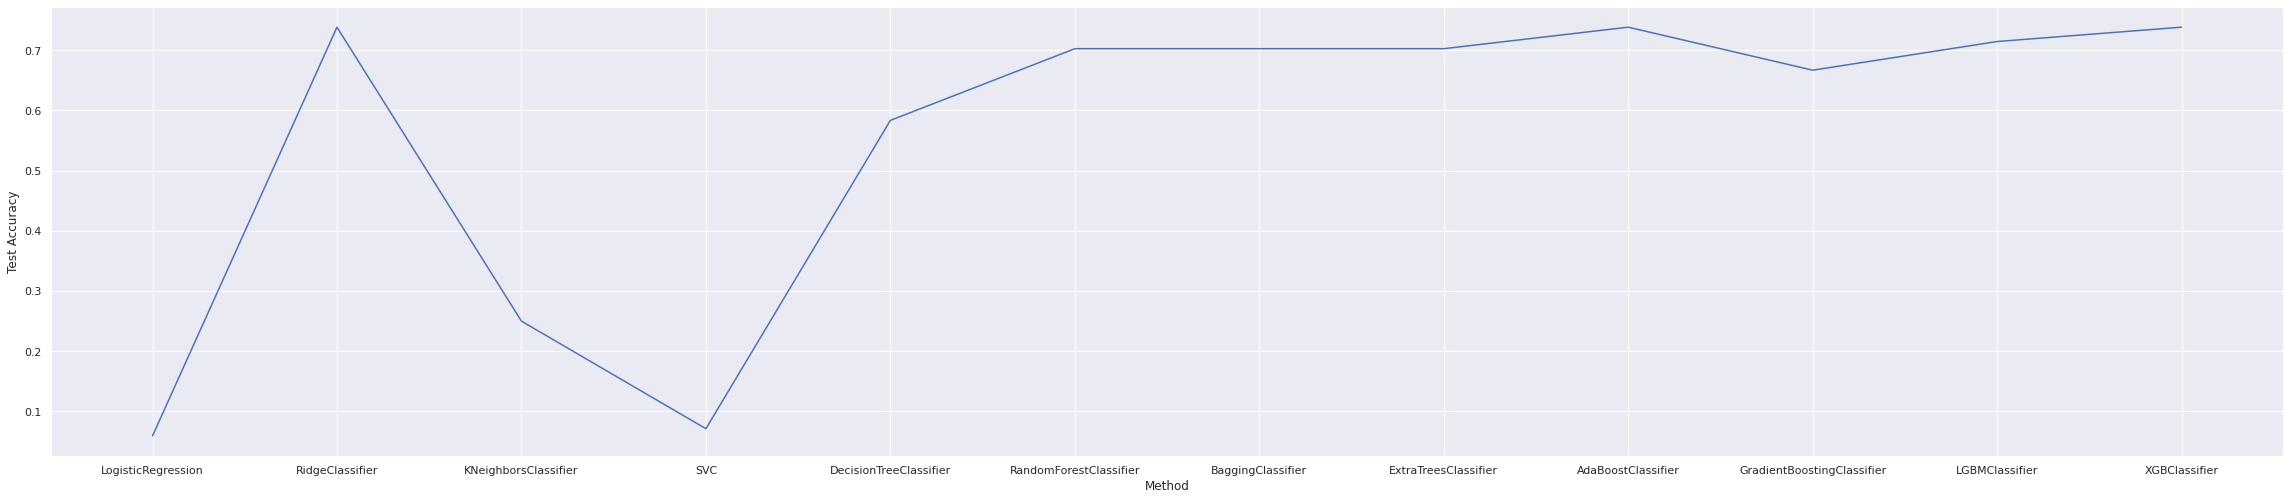

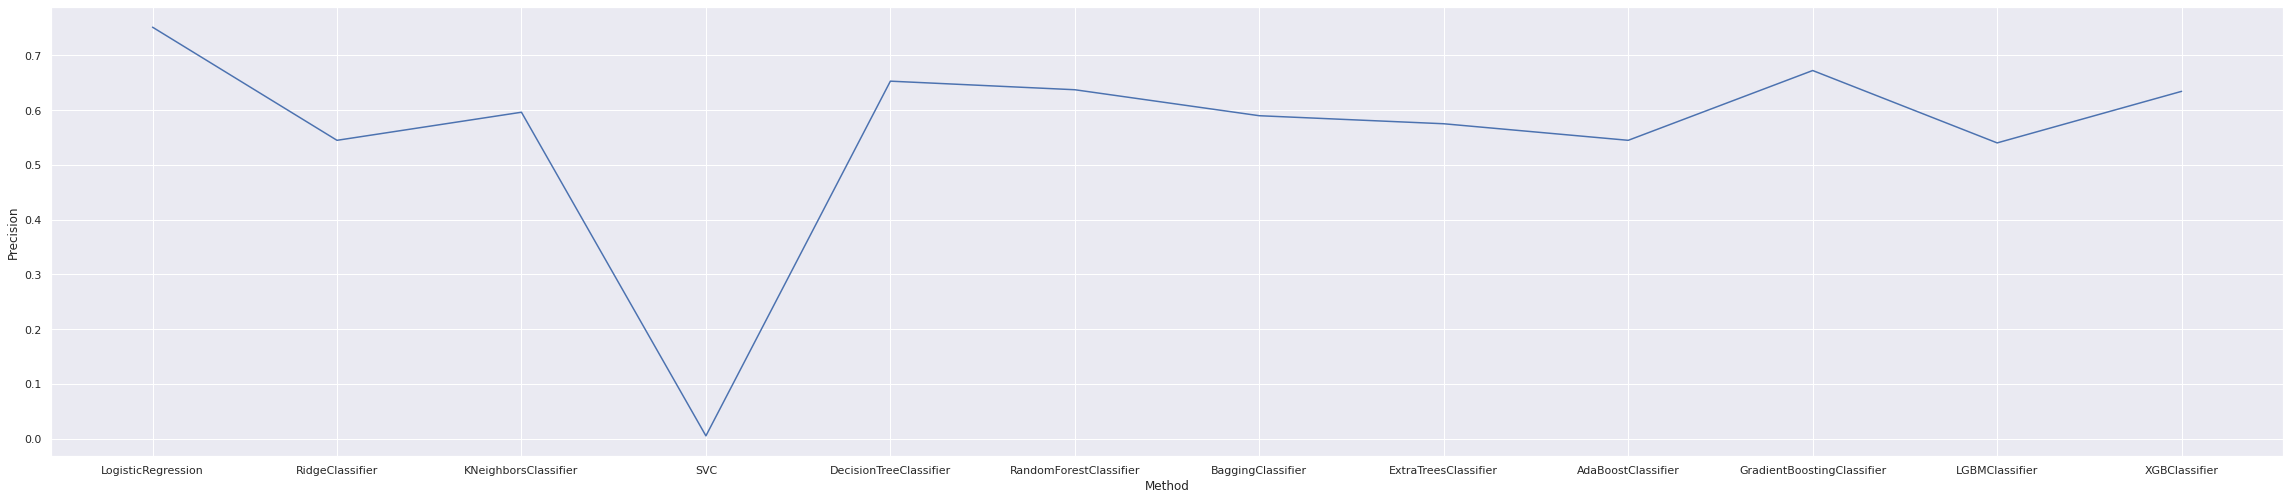

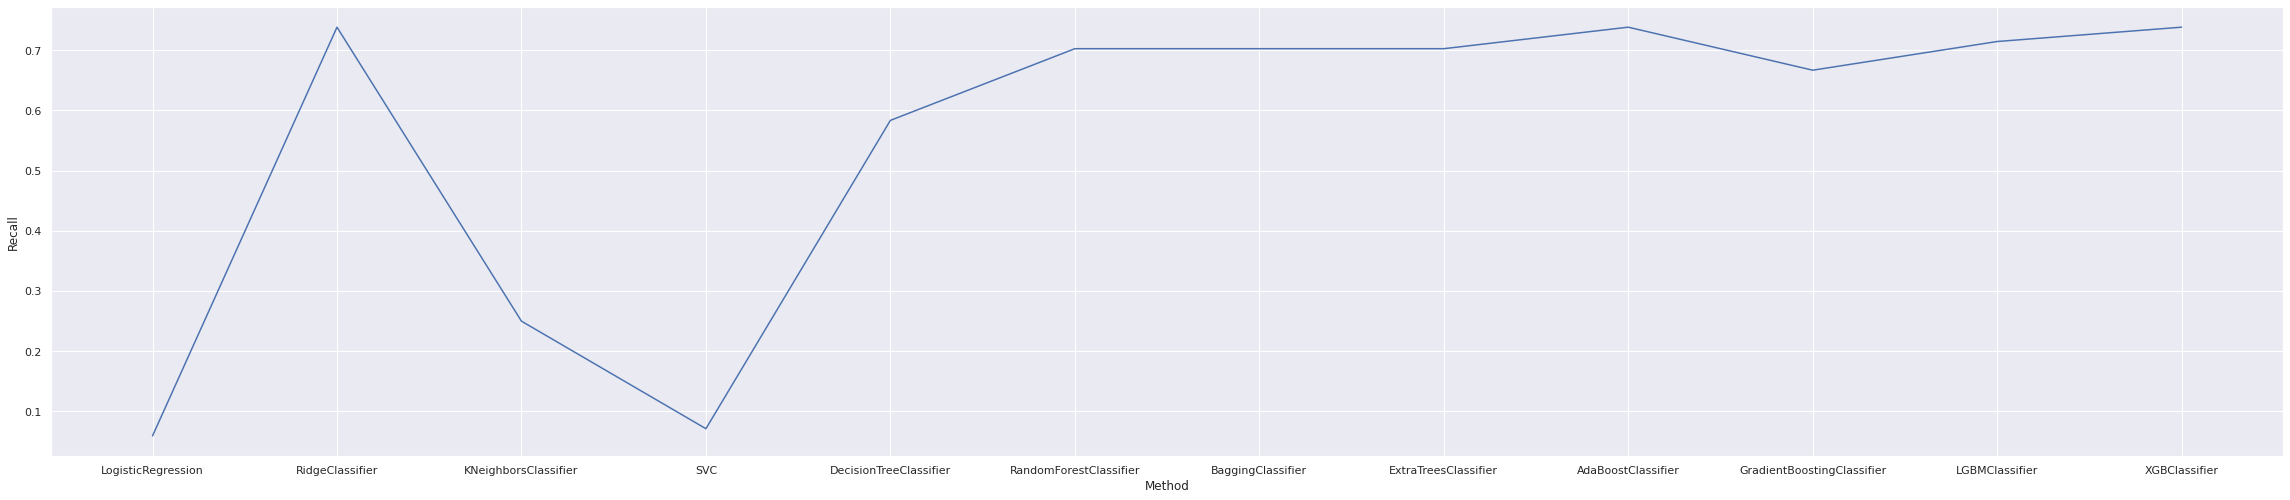

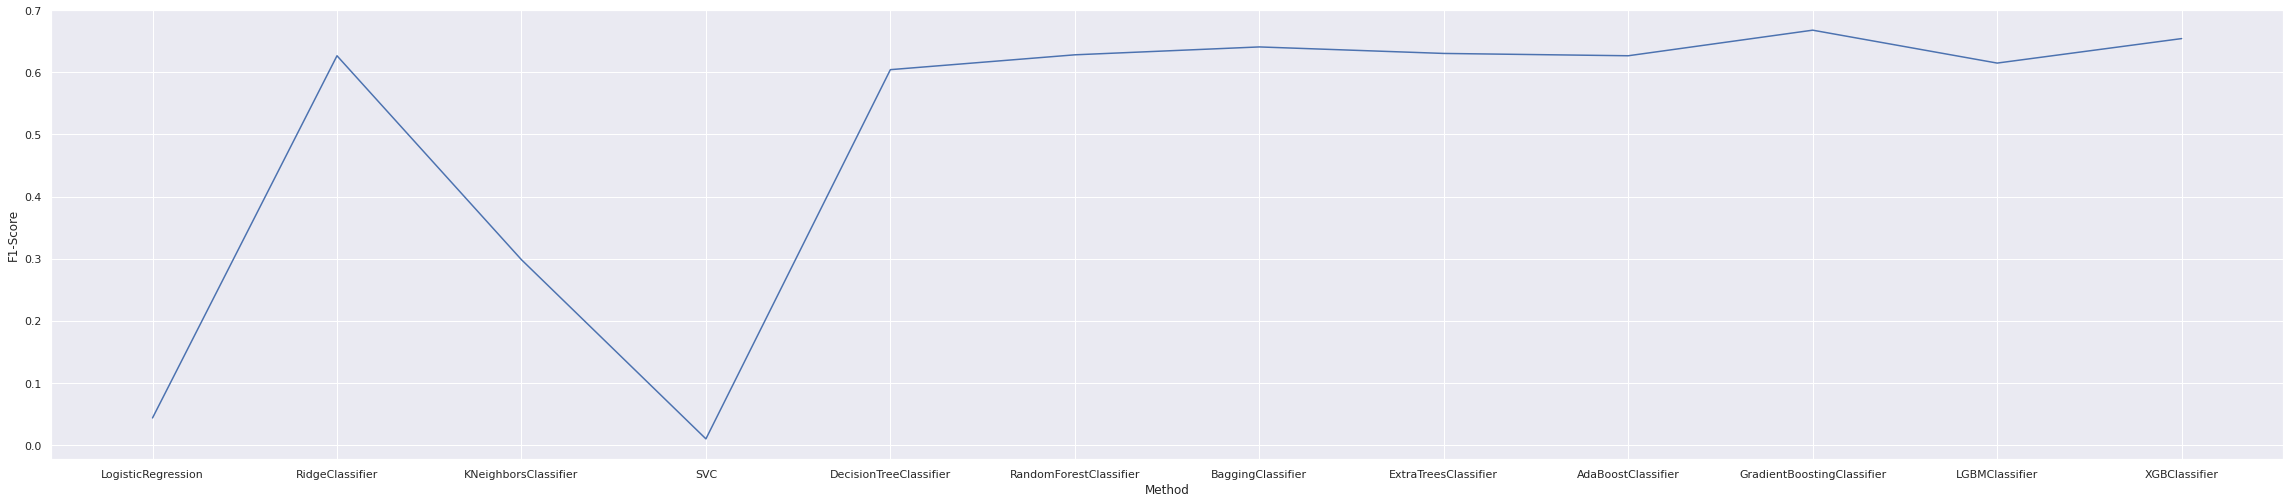

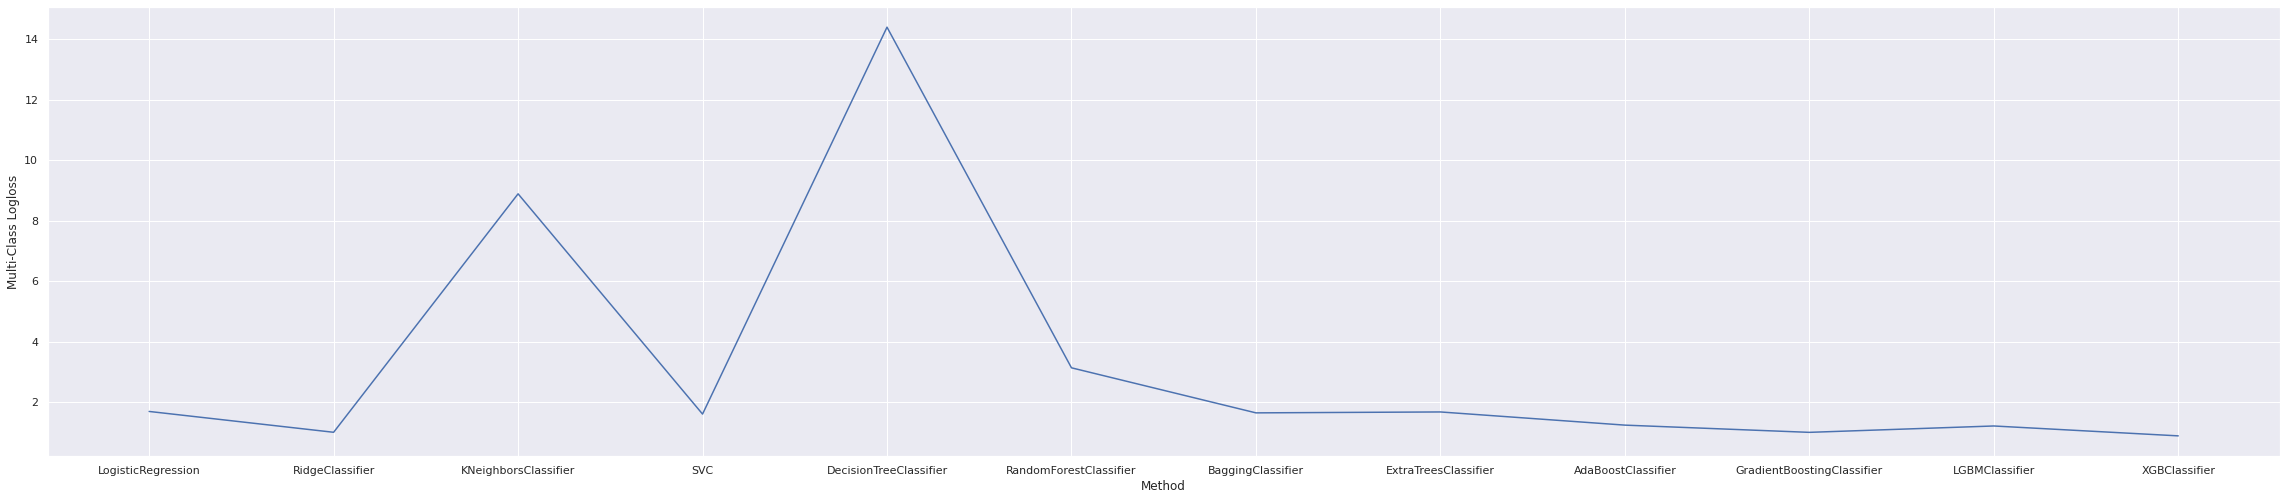

In [128]:
print("All models - Oversampling data")
plotResultData(result_all_oversample)

All models - SMOTE data


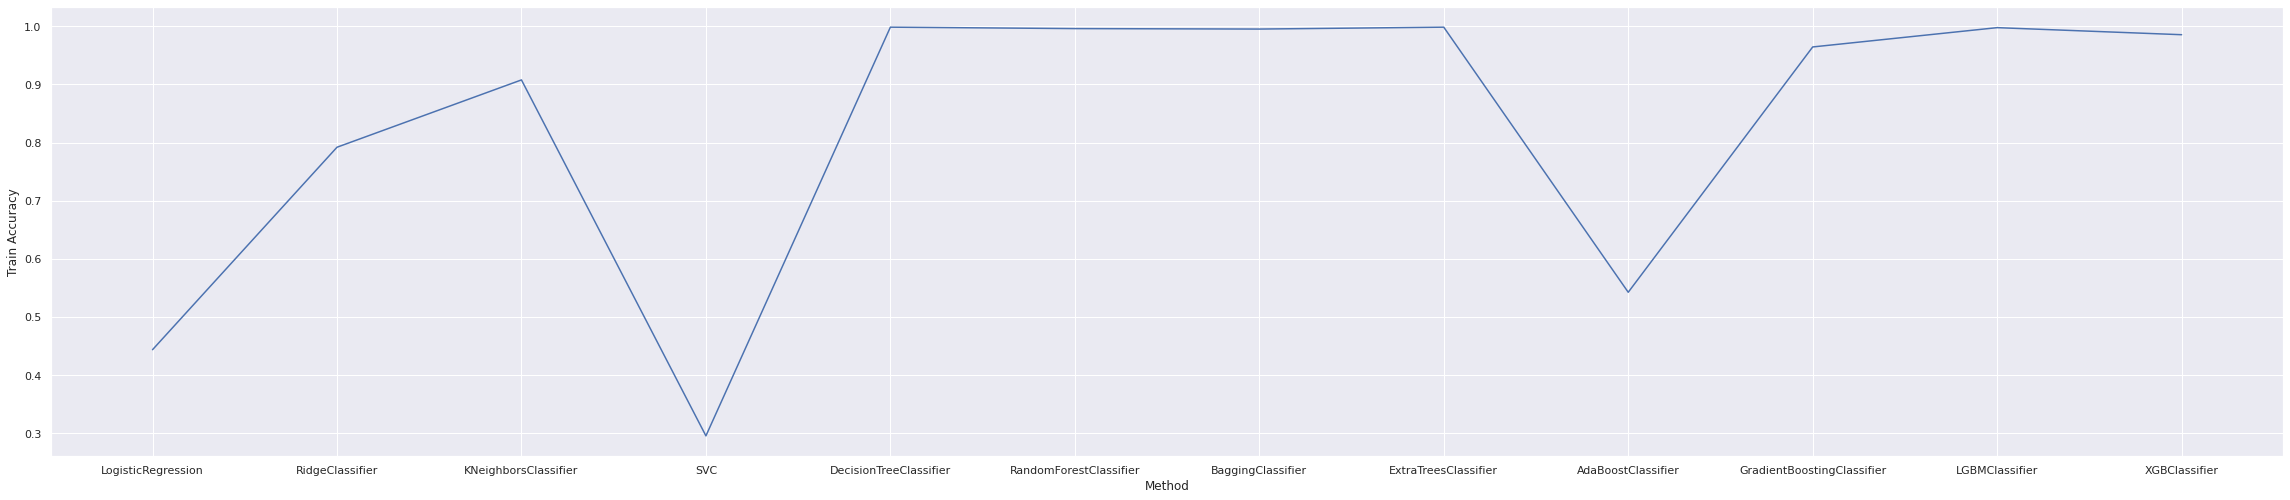

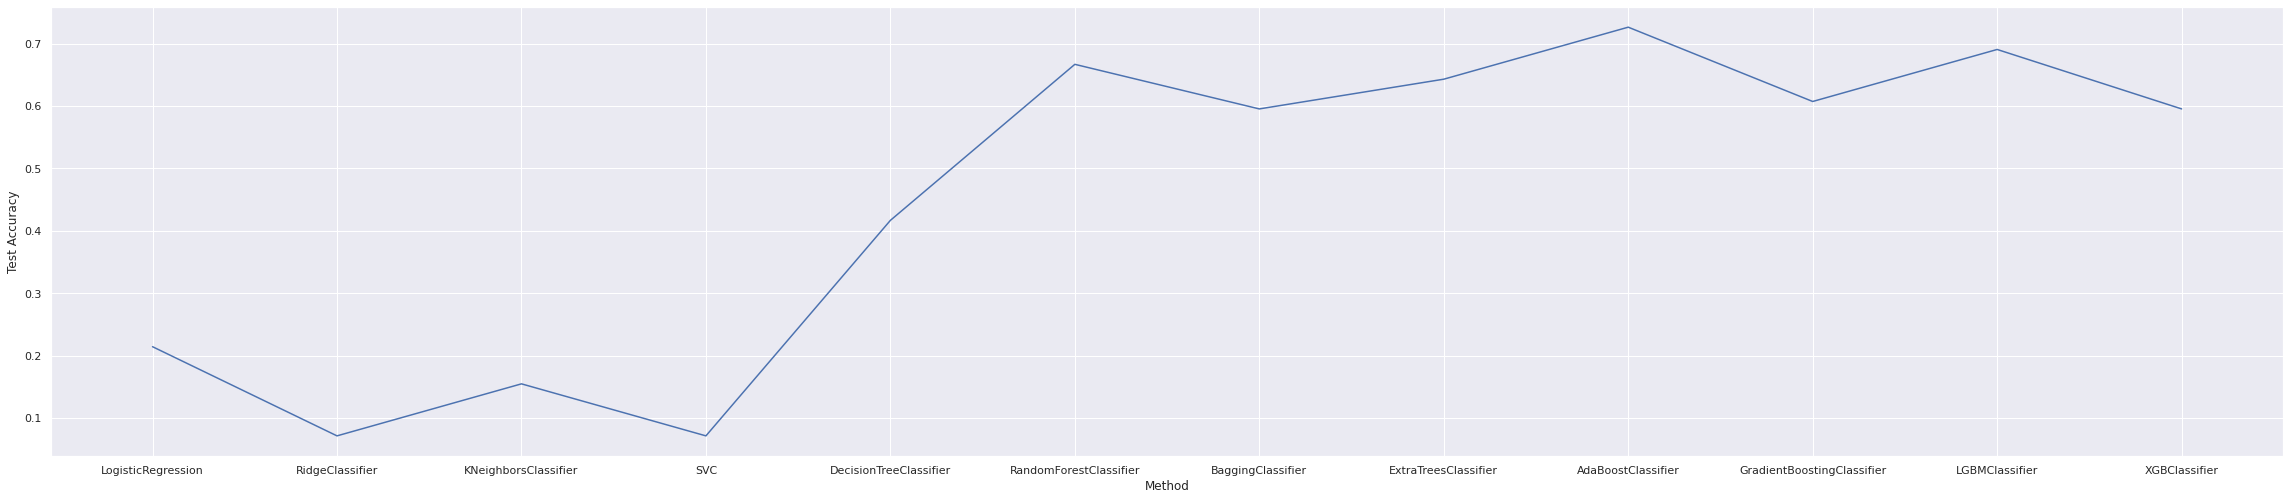

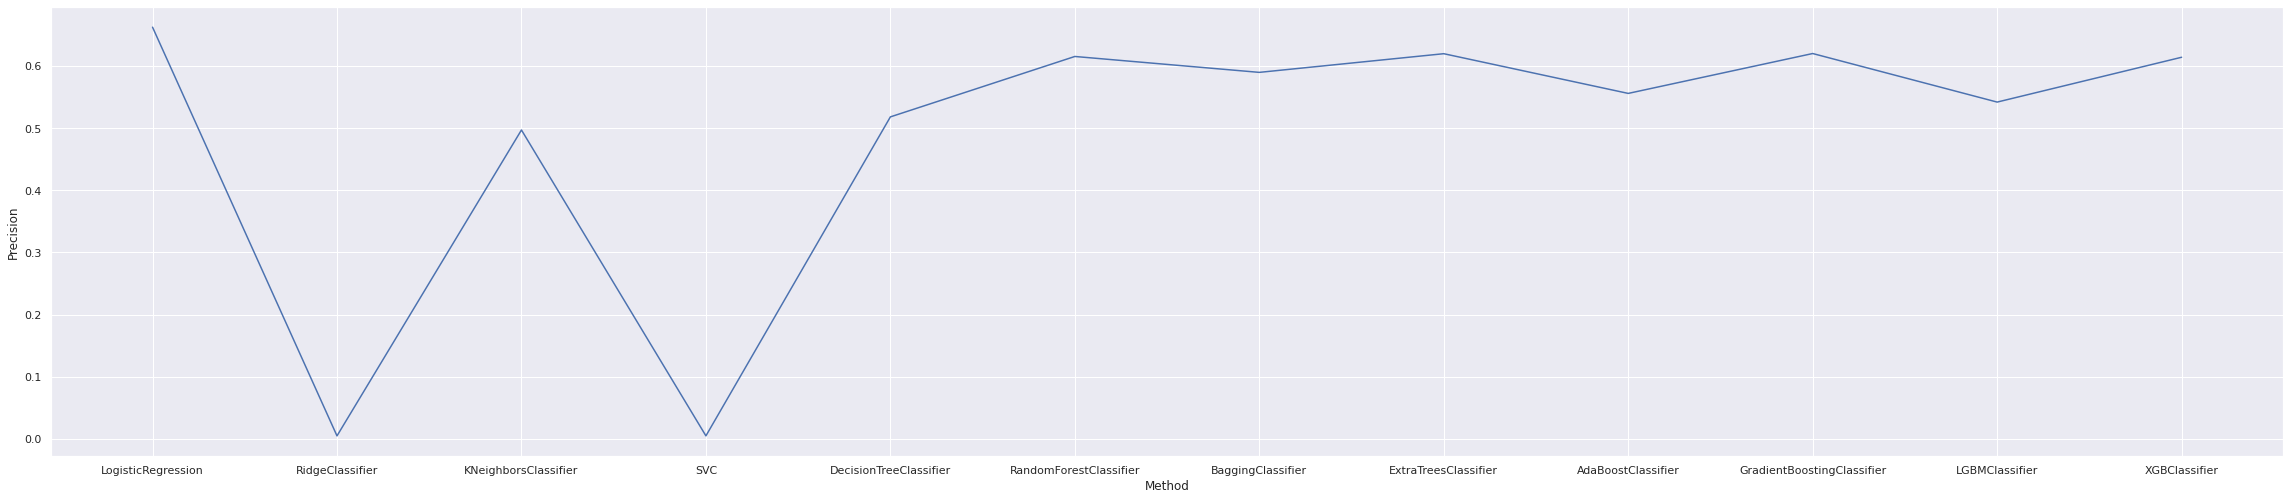

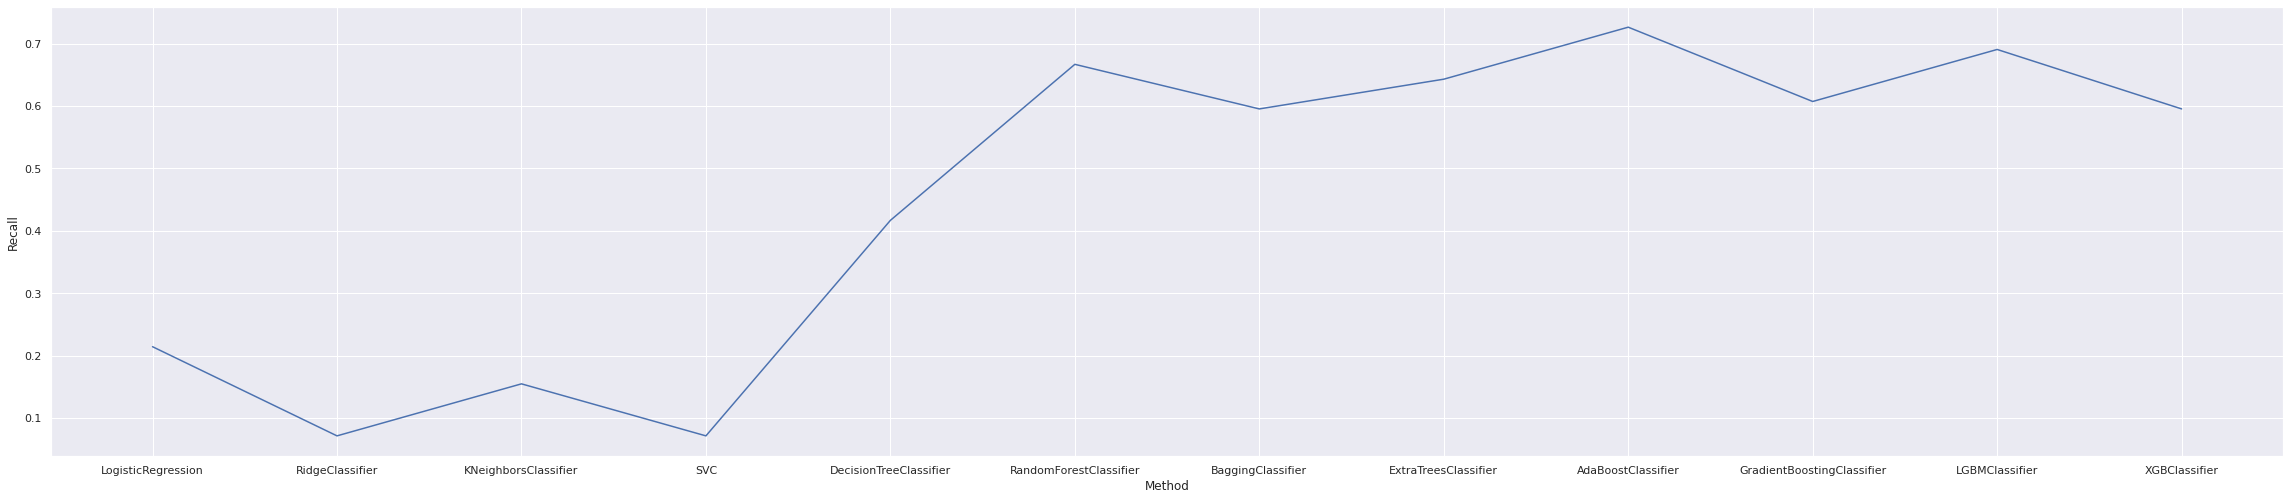

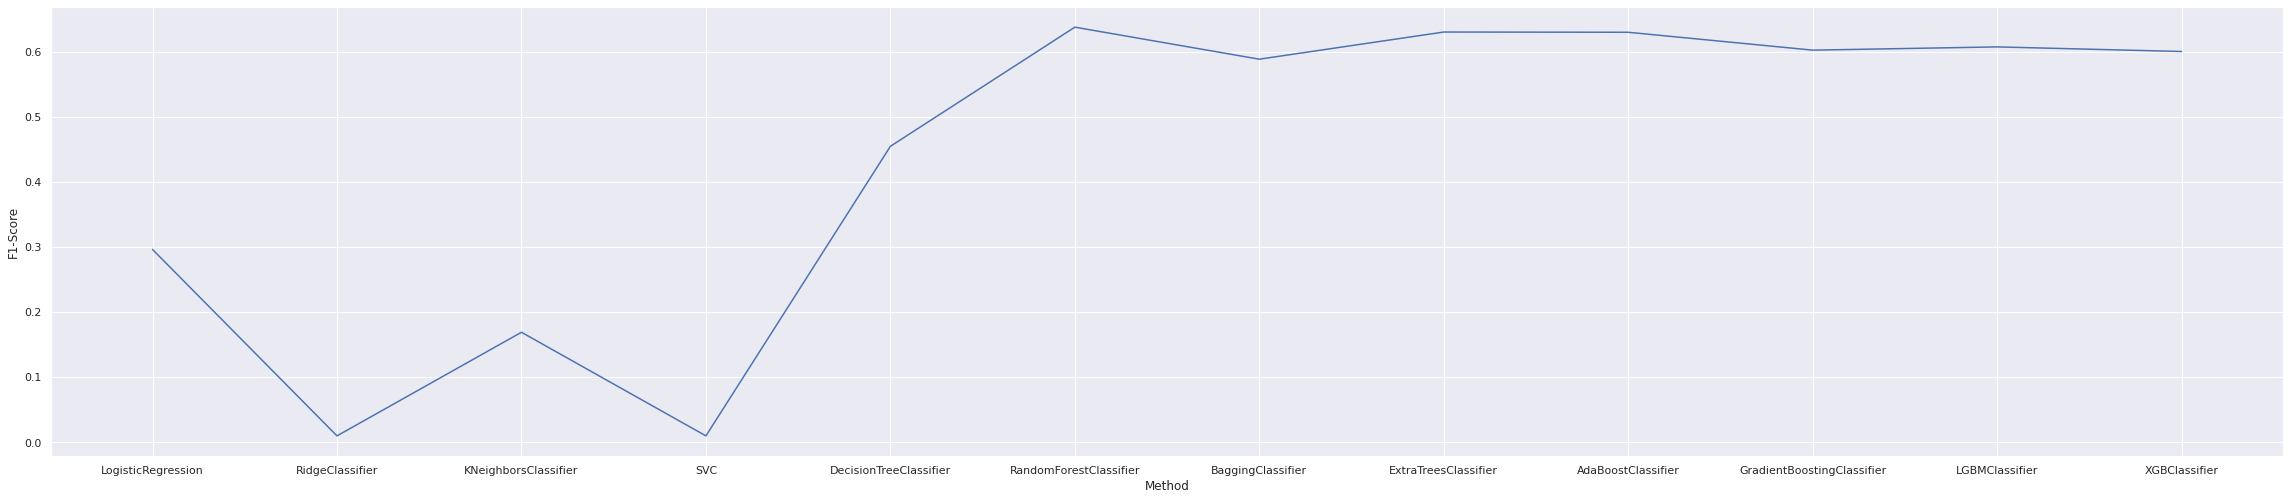

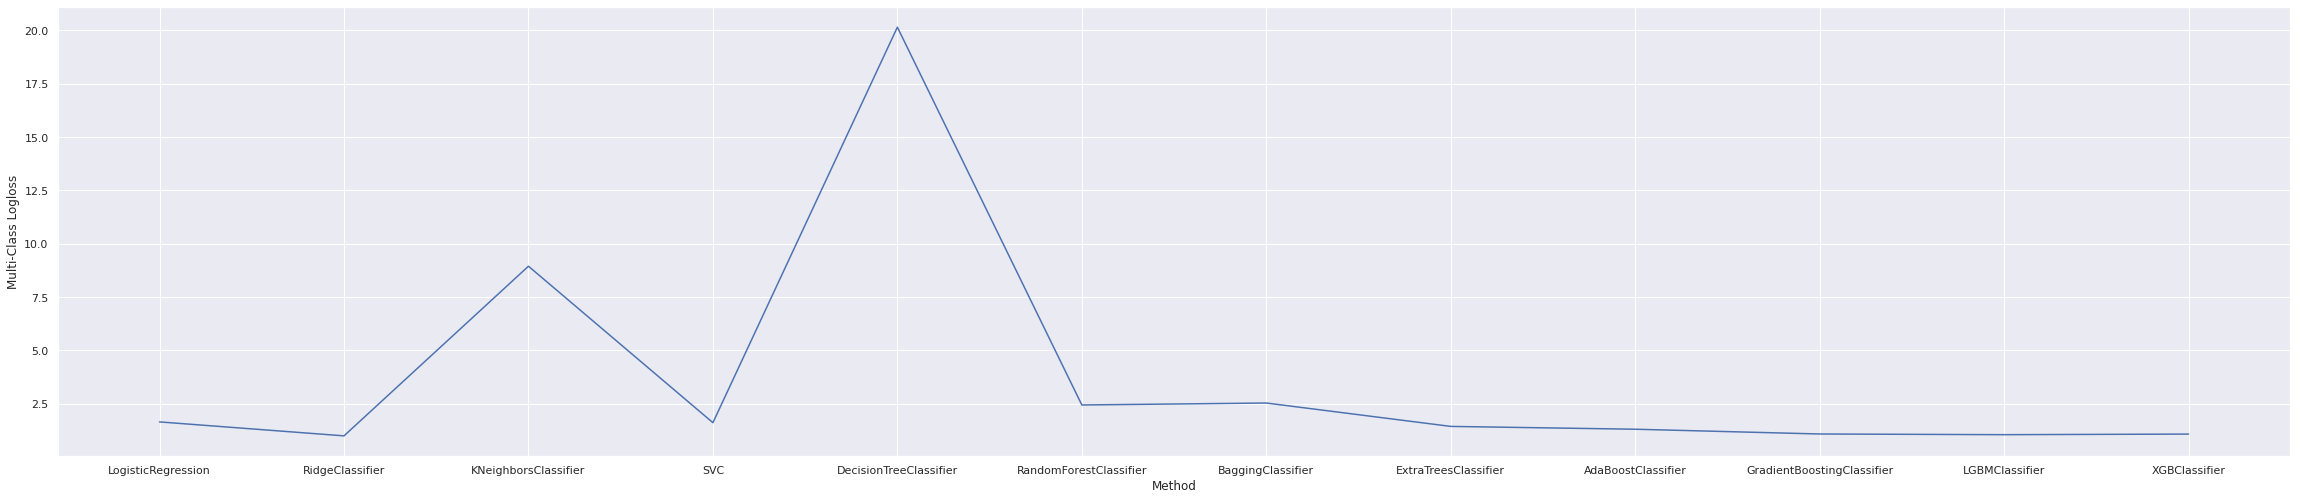

In [129]:
print("All models - SMOTE data")
plotResultData(result_all_smote)

By comparing the results from all above methods, all are over fitting the training data.

## OVERALL MODEL CONCLUSION

1. Logistic Regression

  Best F1_Score: 0.629247 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
  0.629247 (0.026945) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
  95% Confidence interval range: (0.5754 %, 0.6831 %)
  Total duration 428.40893173217773 

2. Ridge

  Best F1_Score: 0.616087 using {'alpha': 0.02}
  0.616087 (0.023211) with: {'alpha': 0.02}
  95% Confidence interval range: (0.5697 %, 0.6625 %)
  Total duration 2.5354909896850586 

3. KNeighborsClassifier

  Best F1_Score: 0.629247 using {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
  0.629247 (0.026945) with: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
  95% Confidence interval range: (0.5754 %, 0.6831 %)
  Total duration 12.201840877532959 

4. SVC

  Best F1_Score: 0.629247 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
  0.629247 (0.026945) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
  95% Confidence interval range: (0.5754 %, 0.6831 %)
  Total duration 7.190079927444458 

5. RandomForestClassifier

  Best F1_Score: 0.622235 using {'max_features': 'sqrt', 'n_estimators': 1000}
  0.622235 (0.028932) with: {'max_features': 'sqrt', 'n_estimators': 1000}
  95% Confidence interval range: (0.5644 %, 0.6801 %)
  Total duration 176.1380627155304 

6. BaggingClassifier

  Best F1_Score: 0.620604 using {'max_samples': 0.75, 'n_estimators': 10}
  0.620604 (0.034210) with: {'max_samples': 0.75, 'n_estimators': 10}
  95% Confidence interval range: (0.5522 %, 0.6890 %)
  Total duration 305.1015794277191 

7. ExtraTreesClassifier

  Best F1_Score: 0.628276 using {'max_features': 'log2', 'min_samples_split': 13, 'n_estimators': 90}
  0.628276 (0.028086) with: {'max_features': 'log2', 'min_samples_split': 13, 'n_estimators': 90}
  95% Confidence interval range: (0.5721 %, 0.6844 %)
  Total duration 688.0113415718079 

8. AdaBoostClassifier

  Best F1_Score: 0.630245 using {'learning_rate': 0.1, 'n_estimators': 70}
  0.630245 (0.030167) with: {'learning_rate': 0.1, 'n_estimators': 70}
  95% Confidence interval range: (0.5699 %, 0.6906 %)
  Total duration 51.544673681259155 

9. GradientBoostingClassifier

  Best F1_Score: 0.613227 using {'learning_rate': 0.1, 'n_estimators': 30}
  0.613227 (0.033099) with: {'learning_rate': 0.1, 'n_estimators': 30}
  95% Confidence interval range: (0.5470 %, 0.6794 %)
  Total duration 165.68569326400757 


10. LGBMClassifier

  Best F1_Score: 0.629247 using {'bagging_fraction': 0.5, 'bagging_frequency': 8, 'boosting_type': 'dart', 'early_stopping_rounds': 200, 'feature_fraction': 0.8, 'learning_rate': 0.0001, 'max_depth': 10, 'metric': 'multi_logloss', 'min_child_samples': 486, 'min_child_weight': 0.01, 'min_data_in_leaf': 90, 'n_estimators': 1000, 'num_class': 5, 'num_leaves': 1550, 'objective': 'multiclass', 'verbosity': 1}
  0.629247 (0.026945) with: {'bagging_fraction': 0.5, 'bagging_frequency': 8, 'boosting_type': 'dart', 'early_stopping_rounds': 200, 'feature_fraction': 0.8, 'learning_rate': 0.0001, 'max_depth': 10, 'metric': 'multi_logloss', 'min_child_samples': 486, 'min_child_weight': 0.01, 'min_data_in_leaf': 90, 'n_estimators': 1000, 'num_class': 5, 'num_leaves': 1550, 'objective': 'multiclass', 'verbosity': 1}
  95% Confidence interval range: (0.5754 %, 0.6831 %)
  Total duration 2430.5182700157166 

## Suggestions

*	We have less number of observations to analyse the cause of accidents correctly and rather we should collect more number of observations to get better results.
*	Less number of features available in dataset.
*	Lack of access to quality data.

*	Once we deploy the finalised model in Production, we might get less f1-score as compared to productionalized model results.

*	Since we are predicting the accident level, we need to be 100% sure or at least close to 100% so that we can prevent the lot of accidents in industry.

*	In this project, we discovered that the main causes of accidents are mistakes in hand-operation and time-related factor.

*	To reduce the occurrences of accidents, more stringent safety standards in hand-operation will be needed in period when many accidents occur.

*	I realized that the detail information of accidents like 'Description' is so useful to analyze the cause.

*	With more detailed information such as machining data (ex. CNC, Current, Voltage) in plants, weather information, employee's personal data (ex. age, experience in the industry sector, work performance ), we can clarify the cause of accidents more correctly.

*	With more number of observations than current number of records = 425 so that we can feed more data into ML/ANN/NLP models to train, evaluate the performance of those models and get the better results.

*	There are quite a lot of Critical risk descriptions, but with the help of SME we can decide whether this column has outliers or not and also SME can help us in understanding the data better.
